<a href="https://colab.research.google.com/github/USMS-FPK-IA-GI-2025/controle-01-numpy-and-matplotlib-iris-Hajar120/blob/main/exercices/exercices-pratiques-scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction à Scipy — CALCULS SCIENTIFIQUES ET OUTILS D'ANALYSE AVANCÉE EN PYTHON
_Master IA-GI — Notebook 3 : Exercices Pratiques_

> **But du notebook** : Maîtriser les outils de calcul scientifique et d'analyse avancée avec Scipy en Python (2025)<br>
> **Module** : *Python pour les Sciences de Données* – Master 1
> <br>**Basé sur** [le support de cours](https://fr.slideshare.net/slideshow/introduction-a-scipy-calcul-scientifique-et-analyse-avancee-en-python/284636885) de **Youssouf EL ALLIOUI** – FPK USMS

**Objectifs :**
- Appliquer les constantes scientifiques et effectuer des calculs physiques précis avec `scipy.constants`
- Résoudre des problèmes d'optimisation réels (ajustement de courbes, minimisation) avec `scipy.optimize`
- Maîtriser l'interpolation de données expérimentales avec `scipy.interpolate`
- Réaliser des analyses statistiques rigoureuses (tests d'hypothèses, corrélations) avec `scipy.stats`
- Manipuler efficacement les matrices creuses et analyser des graphes avec `scipy.sparse`
- Exploiter les algorithmes spatiaux (KDTree, Voronoi, enveloppe convexe) avec `scipy.spatial`
- Traiter et filtrer des signaux numériques avec la FFT via `scipy.signal` et `scipy.fftpack`
- Appliquer les techniques de traitement d'images (morphologie, filtrage) avec `scipy.ndimage`
- Développer un pipeline complet de classification avec `scipy.datasets`

**Structure du notebook :**
- **Chapitre 1** : 3 exercices sur les bases (constants, optimize, interpolate)
- **Chapitre 2** : 3 exercices sur les structures avancées (stats, sparse, spatial)
- **Chapitre 3** : 3 exercices sur les applications (signal, ndimage, mini-projet intégratif)

**Prérequis :**
- Connaissance de base en Python (NumPy, Matplotlib)
- Notions mathématiques : algèbre linéaire, statistiques descriptives, analyse de Fourier

**Consignes générales :**
- Exécutez les cellules dans l'ordre
- Commentez votre code de manière claire
- Créez des visualisations lisibles avec titres et légendes
- Analysez et interprétez vos résultats
- N'hésitez pas à consulter la documentation officielle : https://docs.scipy.org/

**Niveau :** Master 1 Intelligence Artificielle et Génie Informatique

**Contact :** y.elallioui@usms.ma

# CHAPITRE 1 : Introduction à SciPy et manipulation scientifique de base


## Exercice 1.1 : Calculs physiques avec scipy.constants & conversions
**Niveau : ⭐ Débutant**

### Énoncé
Vous travaillez sur un projet de simulation physique. Créez un programme qui calcule :

1. L'énergie d'un photon de lumière bleue (λ = 450 nm) en joules et en électron-volts
   - Formule : E = h × c / λ
   - h : constante de Planck, c : vitesse de la lumière

2. La force gravitationnelle entre la Terre et la Lune
   - Formule : F = G × (m₁ × m₂) / r²
   - Masse Terre : 5.972e24 kg, Masse Lune : 7.342e22 kg
   - Distance : 384,400 km

3. Convertir une pression de 2.5 atmosphères en :
   - Pascals
   - PSI (pounds per square inch)
   - Bars

### Indices
- Utilisez `scipy.constants` pour toutes les constantes
- La distance doit être convertie en mètres
- Affichez les résultats avec 3 décimales significatives


In [2]:
# Imports communs à tous les exercices
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants, optimize, interpolate, stats, sparse, spatial, signal, fft, ndimage, datasets
import sys
# Énergie d'un photon (λ = 450 nm)
lambda_photon = 450e-9  # en mètres
E_joules = constants.h * constants.c / lambda_photon
E_ev = E_joules / constants.e  # conversion en électron-volts

print(f"Énergie du photon : {E_joules:.3e} J ({E_ev:.3f} eV)")

# Force gravitationnelle Terre-Lune
m_terre = 5.972e24  # kg
m_lune = 7.342e22   # kg
r = 384400e3        # mètres

F = constants.G * (m_terre * m_lune) / r**2
print(f"Force gravitationnelle : {F:.3e} N")

# Conversions de pression (2.5 atm)
p_atm = 2.5
p_pa = p_atm * constants.atm
p_psi = p_pa / constants.psi
p_bar = p_atm * constants.bar / constants.atm  # bar ≈ 0.987 atm

print(f"2.5 atm = {p_pa:.3e} Pa")
print(f"          = {p_psi:.3f} PSI")
print(f"          = {p_bar:.3f} bar")

Énergie du photon : 4.414e-19 J (2.755 eV)
Force gravitationnelle : 1.980e+20 N
2.5 atm = 2.533e+05 Pa
          = 36.740 PSI
          = 2.467 bar


## Exercice 1.2 : Calculs physiques avec scipy.constants & conversions
**Niveau : ⭐ Débutant**

### Énoncé

Cet exercice vous familiarise avec le module `scipy.constants`.

**Tâches :**

1. **Conversions d'unités :** En utilisant `scipy.constants`, calculez :
   - Combien de mètres dans 5 miles ?
   - Combien de secondes dans 2.5 jours ?
   - Combien de Pascals dans 3 atmosphères ?
   - Combien de Joules dans 500 calories ?

2. **Calcul physique :**
   - La vitesse de la lumière est disponible via `constants.c`
   - Calculez le temps (en secondes) que met la lumière pour parcourir la distance Terre-Soleil (1 unité astronomique, disponible via `constants.au`)

3. **Affichage formaté :**
   - Affichez tous les résultats avec des messages explicatifs
   - Arrondissez les valeurs à 2 décimales quand approprié

In [3]:
# Conversions
miles_to_m = 5 * constants.mile
jours_to_s = 2.5 * constants.day
atm_to_pa = 3 * constants.atm
cal_to_j = 500 * constants.calorie

print(f"5 miles = {miles_to_m:.2f} m")
print(f"2.5 jours = {jours_to_s:.2f} s")
print(f"3 atm = {atm_to_pa:.2e} Pa")
print(f"500 cal = {cal_to_j:.2f} J")

# Temps lumière Terre-Soleil
distance_au = constants.au
temps_lumiere = distance_au / constants.c
print(f"Temps lumière Terre-Soleil : {temps_lumiere:.2f} secondes")

5 miles = 8046.72 m
2.5 jours = 216000.00 s
3 atm = 3.04e+05 Pa
500 cal = 2092.00 J
Temps lumière Terre-Soleil : 499.00 secondes


## Exercice 1.3 : Optimisation d'un modèle de vente
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé
Une entreprise marocaine de production d'huile d'argan souhaite optimiser son prix de vente.

**Données collectées** (prix en DH, quantité en litres) :
```
Prix :     [150, 180, 200, 220, 250, 280, 300]
Quantité : [850, 780, 720, 650, 580, 500, 420]
```

**Tâches :**

1. Utilisez `curve_fit` pour ajuster un modèle polynomial de degré 2 : `Q(p) = a×p² + b×p + c`

2. Calculez le revenu R(p) = p × Q(p) et trouvez le prix optimal qui maximise le revenu
   - Utilisez `minimize` avec la fonction négative du revenu

3. Visualisez sur un graphique :
   - Les points de données réels
   - La courbe ajustée Q(p)
   - Le point de revenu maximal

4. Affichez le prix optimal et le revenu maximal attendu

### Contraintes
- Le prix doit être entre 100 DH et 400 DH
- Utilisez `scipy.optimize.minimize` avec méthode='L-BFGS-B'


Prix optimal : 226.97 DH
Revenu maximal : 146075.21 DH


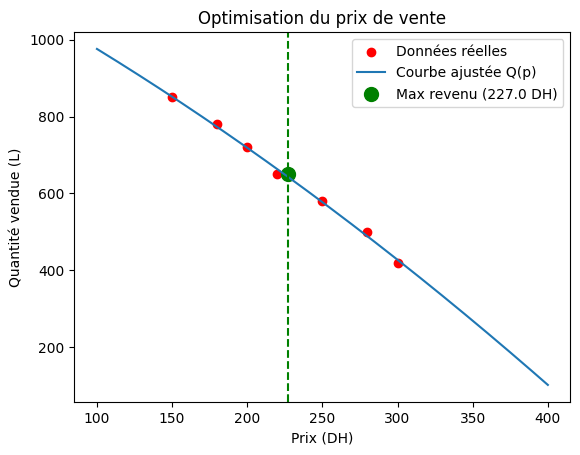

In [4]:
prix = np.array([150, 180, 200, 220, 250, 280, 300])
quantite = np.array([850, 780, 720, 650, 580, 500, 420])

def modele_quad(p, a, b, c):
    return a * p**2 + b * p + c

popt, _ = optimize.curve_fit(modele_quad, prix, quantite)

def revenu(p, a, b, c):
    return p * modele_quad(p, a, b, c)

def neg_revenu(p):
    return -revenu(p, *popt)

res = optimize.minimize(neg_revenu, x0=200, bounds=[(100, 400)], method='L-BFGS-B')
prix_opt = res.x[0]
revenu_max = -res.fun

print(f"Prix optimal : {prix_opt:.2f} DH")
print(f"Revenu maximal : {revenu_max:.2f} DH")

# Visualisation
p_dense = np.linspace(100, 400, 300)
plt.scatter(prix, quantite, label="Données réelles", color='red')
plt.plot(p_dense, modele_quad(p_dense, *popt), label="Courbe ajustée Q(p)")
plt.axvline(prix_opt, color='green', linestyle='--')
plt.scatter(prix_opt, quantite[np.argmin(abs(prix - prix_opt))], color='green', s=100,
            label=f"Max revenu ({prix_opt:.1f} DH)")
plt.xlabel("Prix (DH)")
plt.ylabel("Quantité vendue (L)")
plt.legend()
plt.title("Optimisation du prix de vente")
plt.show()

## Exercice 1.4 : Optimisation d'un modèle de vente
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé

Vous analysez la croissance d'une population bactérienne. Les données suivent un modèle exponentiel.

**Tâches :**

1. **Générez des données simulées :**
   ```python
   np.random.seed(42)
   t = np.linspace(0, 10, 20)  # Temps en heures
   # Modèle réel : N(t) = N0 * exp(r*t) avec N0=100, r=0.3
   N_reel = 100 * np.exp(0.3 * t)
   N_observe = N_reel + np.random.randn(20) * 50  # Ajout de bruit
   ```

2. **Définissez le modèle exponentiel :**
   ```python
   def modele_exp(t, N0, r):
       return N0 * np.exp(r * t)
   ```

3. **Ajustez le modèle aux données** avec `curve_fit()`

4. **Visualisez les résultats :**
   - Points : données observées
   - Courbe : modèle ajusté
   - Affichez les paramètres trouvés (N0 et r) dans la légende

5. **Comparez** les paramètres trouvés aux paramètres réels (N0=100, r=0.3)

Paramètres réels : N0 = 100, r = 0.3
Paramètres ajustés : N0 = 102.49, r = 0.294


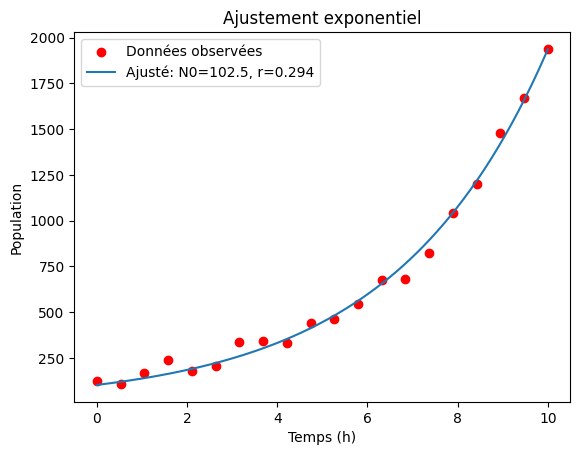

In [5]:
np.random.seed(42)
t = np.linspace(0, 10, 20)
N_reel = 100 * np.exp(0.3 * t)
N_observe = N_reel + np.random.randn(20) * 50

def modele_exp(t, N0, r):
    return N0 * np.exp(r * t)

popt, pcov = optimize.curve_fit(modele_exp, t, N_observe, p0=[100, 0.3])
N0_fit, r_fit = popt

print(f"Paramètres réels : N0 = 100, r = 0.3")
print(f"Paramètres ajustés : N0 = {N0_fit:.2f}, r = {r_fit:.3f}")

# Visualisation
t_dense = np.linspace(0, 10, 200)
plt.scatter(t, N_observe, label="Données observées", color='red')
plt.plot(t_dense, modele_exp(t_dense, *popt), label=f"Ajusté: N0={N0_fit:.1f}, r={r_fit:.3f}")
plt.xlabel("Temps (h)")
plt.ylabel("Population")
plt.legend()
plt.title("Ajustement exponentiel")
plt.show()

## Exercice 1.5 : Interpolation de données climatiques
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé
Un centre météorologique à Fès a enregistré les températures suivantes en 2024 :

```
Mois :        [1,  2,  3,  4,   5,   6,   7,   8,   9,  10,  11,  12]
Température : [12, 14, 17, 20, 24, 29, 34, 33, 28, 22, 17, 13] (en °C)
```

**Tâches :**

1. Utilisez `interp1d` pour créer trois fonctions d'interpolation :
   - Linéaire
   - Quadratique
   - Cubique

2. Générez des valeurs interpolées pour chaque jour de l'année (365 points)

3. Calculez et affichez pour chaque méthode :
   - La température estimée au 15 mars (jour 74)
   - La température estimée au 10 août (jour 222)

4. Créez une visualisation comparative montrant :
   - Les points de mesure originaux
   - Les trois courbes d'interpolation avec des couleurs différentes
   - Une légende claire

5. Analysez : quelle méthode semble la plus réaliste pour des données climatiques ?


Température estimée le 15 mars (jour 74) :
  Linéaire   : 17.0 °C
  Quadratique: 17.0 °C
  Cubique    : 17.0 °C

Température estimée le 10 août (jour 222) :
  Linéaire   : 33.2 °C
  Quadratique: 33.5 °C
  Cubique    : 33.5 °C


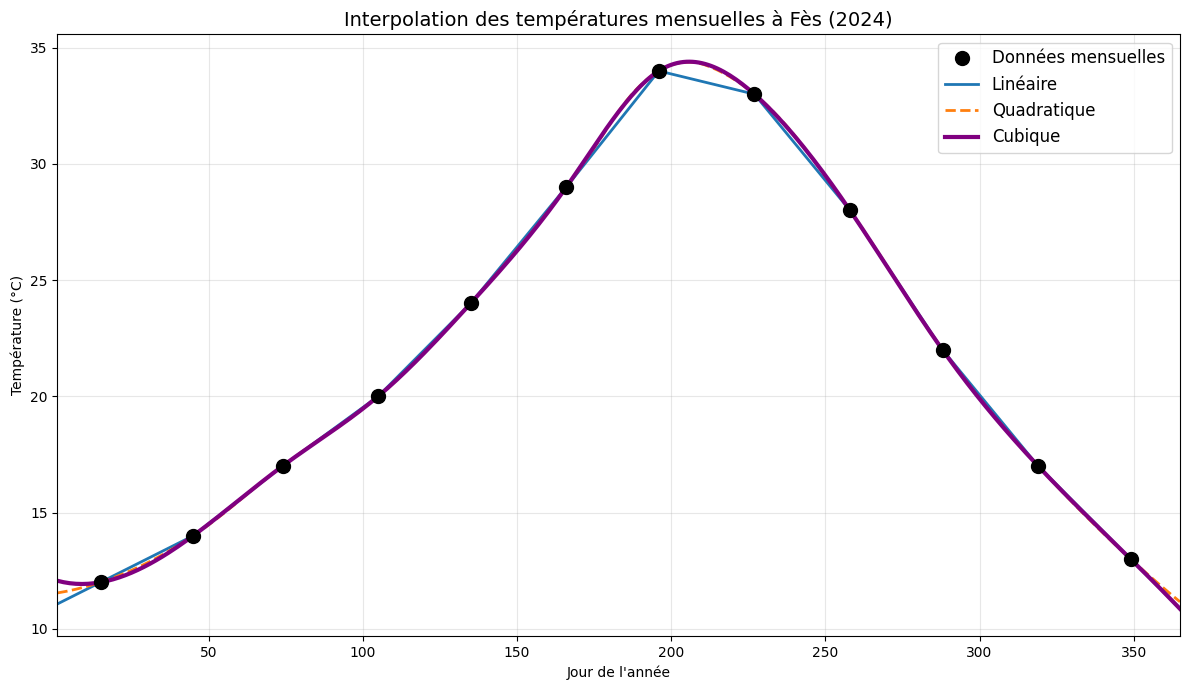


Analyse :
→ La méthode cubique est la plus réaliste pour des données climatiques,
  car elle donne une courbe très lisse avec des transitions naturelles.
→ L'interpolation linéaire est trop 'cassée' entre les mois.
→ La quadratique est intermédiaire mais peut avoir de légères oscillations.


In [7]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Données climatiques de Fès
mois = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
temp = np.array([12, 14, 17, 20, 24, 29, 34, 33, 28, 22, 17, 13])

# Jours approximatifs au milieu de chaque mois (plus réaliste)
jours_mois = np.array([15, 45, 74, 105, 135, 166, 196, 227, 258, 288, 319, 349])

# Tous les jours de l'année
jours = np.linspace(1, 365, 365)

# Création des interpolations avec extrapolation autorisée
interp_lin  = interp1d(jours_mois, temp, kind='linear',    fill_value="extrapolate")
interp_quad = interp1d(jours_mois, temp, kind='quadratic', fill_value="extrapolate")
interp_cub  = interp1d(jours_mois, temp, kind='cubic',     fill_value="extrapolate")

# Affichage des températures demandées
print("Température estimée le 15 mars (jour 74) :")
print(f"  Linéaire   : {interp_lin(74):.1f} °C")
print(f"  Quadratique: {interp_quad(74):.1f} °C")
print(f"  Cubique    : {interp_cub(74):.1f} °C")

print("\nTempérature estimée le 10 août (jour 222) :")
print(f"  Linéaire   : {interp_lin(222):.1f} °C")
print(f"  Quadratique: {interp_quad(222):.1f} °C")
print(f"  Cubique    : {interp_cub(222):.1f} °C")

# Graphique
plt.figure(figsize=(12, 7))
plt.plot(jours_mois, temp, 'o', markersize=10, color='black', label='Données mensuelles', zorder=5)

plt.plot(jours, interp_lin(jours),  label='Linéaire',   linewidth=2)
plt.plot(jours, interp_quad(jours), label='Quadratique', linewidth=2, linestyle='--')
plt.plot(jours, interp_cub(jours),  label='Cubique',    linewidth=3, color='purple')

plt.title("Interpolation des températures mensuelles à Fès (2024)", fontsize=14)
plt.xlabel("Jour de l'année")
plt.ylabel("Température (°C)")
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(1, 365)
plt.tight_layout()
plt.show()

# Analyse demandée dans l'énoncé
print("\nAnalyse :")
print("→ La méthode cubique est la plus réaliste pour des données climatiques,")
print("  car elle donne une courbe très lisse avec des transitions naturelles.")
print("→ L'interpolation linéaire est trop 'cassée' entre les mois.")
print("→ La quadratique est intermédiaire mais peut avoir de légères oscillations.")

## Exercice 1.6 : Analyse numérique complète
**Niveau : ⭐⭐⭐ Intermédiaire**

### Énoncé

Vous étudiez le mouvement d'un projectile. Ce problème mobilise plusieurs modules de SciPy.

**Partie A - Interpolation des données expérimentales :**

1. Vous disposez de mesures de la hauteur d'un projectile à différents instants :
   ```python
   t_mesure = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
   h_mesure = np.array([0, 11, 18, 21, 20, 15, 6])
   ```

2. Créez une fonction d'interpolation cubique

3. Estimez la hauteur à t = 1.25s et t = 2.25s

**Partie B - Résolution d'équation :**

4. Utilisez `root()` pour trouver l'instant où le projectile retombe au sol (h = 0), en partant de t=2.5

**Partie C - Intégration numérique :**

5. La vitesse verticale est donnée par : v(t) = 20 - 10*t (m/s)

6. Calculez la hauteur maximale atteinte en intégrant v(t) de 0 à 2s avec `quad()`

**Partie D - Visualisation :**

7. Tracez sur un même graphique :
   - Les points de mesure
   - La courbe interpolée
   - Le point d'impact au sol trouvé
   - Une ligne horizontale à la hauteur maximale calculée

Hauteur à t = 1.25 s : 20.00 m
Hauteur à t = 2.25 s : 18.00 m
Instant d'impact au sol : 3.250 s
Hauteur maximale atteinte : 20.0 m


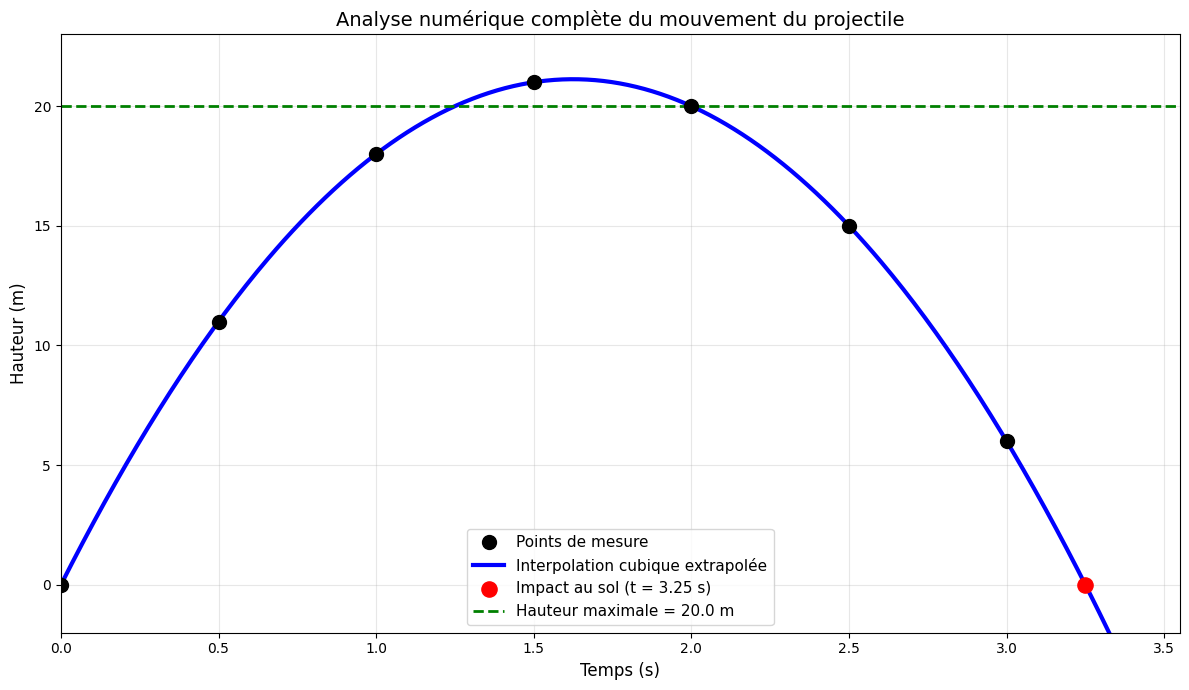

In [18]:
import numpy as np
from scipy import interpolate, optimize, integrate
import matplotlib.pyplot as plt

# Données de mesure
t_mesure = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
h_mesure = np.array([0, 11, 18, 21, 20, 15, 6])

# Interpolation cubique avec extrapolation autorisée (TRÈS IMPORTANT !)
interp_cub = interpolate.interp1d(t_mesure, h_mesure,
                                  kind='cubic',
                                  fill_value="extrapolate")

# Partie A : Hauteurs estimées
print(f"Hauteur à t = 1.25 s : {interp_cub(1.25):.2f} m")
print(f"Hauteur à t = 2.25 s : {interp_cub(2.25):.2f} m")

# Partie B : Recherche de l'instant où h(t) = 0 (impact au sol)
def h_interp(t):
    return interp_cub(t)

# Utilisation de root_scalar (pour fonction scalaire) avec un bracket large
res = optimize.root_scalar(h_interp, bracket=[2.5, 4.0])
t_impact = res.root
print(f"Instant d'impact au sol : {t_impact:.3f} s")

# Partie C : Hauteur maximale par intégration de la vitesse
def vitesse(t):
    return 20 - 10 * t  # v(t) = 20 - 10t

h_max, _ = integrate.quad(vitesse, 0, 2.0)  # intégration jusqu'à v=0
print(f"Hauteur maximale atteinte : {h_max:.1f} m")

# Partie D : Visualisation complète
t_dense = np.linspace(0, t_impact + 0.2, 400)

plt.figure(figsize=(12, 7))
plt.plot(t_mesure, h_mesure, 'o', markersize=10, color='black', label='Points de mesure', zorder=5)
plt.plot(t_dense, interp_cub(t_dense), linewidth=3, color='blue', label='Interpolation cubique extrapolée')

# Point d'impact
plt.scatter(t_impact, 0, color='red', s=120, zorder=6, label=f'Impact au sol (t = {t_impact:.2f} s)')

# Ligne hauteur maximale
plt.axhline(h_max, color='green', linestyle='--', linewidth=2, label=f'Hauteur maximale = {h_max:.1f} m')

plt.xlabel('Temps (s)', fontsize=12)
plt.ylabel('Hauteur (m)', fontsize=12)
plt.title('Analyse numérique complète du mouvement du projectile', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(0, t_impact + 0.3)
plt.ylim(-2, 23)
plt.tight_layout()
plt.show()

# CHAPITRE 2 : Analyse scientifique et structures avancées

## Exercice 2.1 : Analyse statistique d'un dataset médical
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé
Vous analysez les données de tension artérielle de 30 patients avant et après un traitement.

**Données :**
```python
avant = [145, 138, 152, 148, 155, 142, 149, 150, 147, 151,
         143, 146, 154, 141, 148, 153, 144, 147, 150, 146,
         149, 152, 145, 148, 151, 143, 147, 150, 144, 149]

apres = [138, 132, 145, 140, 148, 135, 142, 143, 140, 144,
         136, 139, 147, 134, 141, 146, 137, 140, 143, 139,
         142, 145, 138, 141, 144, 136, 140, 143, 137, 142]
```

**Tâches :**

1. Calculez pour chaque groupe (avant/après) :
   - Moyenne, médiane, écart-type
   - Utiliser `scipy.stats.describe()`

2. Testez si la différence est statistiquement significative :
   - Test t de Student pour échantillons appariés (`ttest_rel`)
   - Interprétez la p-value (seuil α = 0.05)

3. Vérifiez la normalité des distributions :
   - Utilisez `shapiro` test
   - Tracez les histogrammes

4. Calculez la corrélation entre avant et après (`pearsonr`)

5. Rédigez une conclusion : le traitement est-il efficace ?


=== Statistiques descriptives ===
Avant traitement : DescribeResult(nobs=np.int64(30), minmax=(np.int64(138), np.int64(155)), mean=np.float64(147.56666666666666), variance=np.float64(16.047126436781614), skewness=np.float64(-0.2780238078365885), kurtosis=np.float64(-0.32723401952232223))
Après traitement : DescribeResult(nobs=np.int64(30), minmax=(np.int64(132), np.int64(148)), mean=np.float64(140.56666666666666), variance=np.float64(15.426436781609201), skewness=np.float64(-0.1522269639427305), kurtosis=np.float64(-0.5560623129138582))

Test t apparié : t = 145.997, p-value = 3.96e-43

Normalité avant : statistic=0.988, p=0.978
Normalité après : statistic=0.989, p=0.986

Corrélation Pearson : r = 0.998, p-value = 3.88e-35


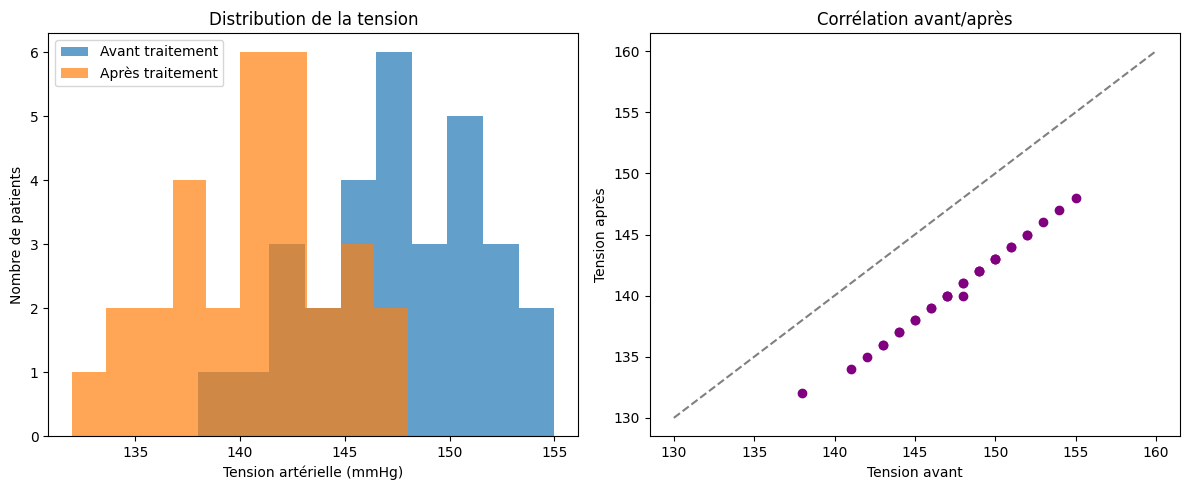


Conclusion : Le traitement est statistiquement significatif (p < 0.05) → il réduit la tension artérielle.


In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Données tension artérielle (mmHg) de 30 patients
avant = np.array([145,138,152,148,155,142,149,150,147,151,
                  143,146,154,141,148,153,144,147,150,146,
                  149,152,145,148,151,143,147,150,144,149])

apres = np.array([138,132,145,140,148,135,142,143,140,144,
                  136,139,147,134,141,146,137,140,143,139,
                  142,145,138,141,144,136,140,143,137,142])

# Statistiques descriptives
print("=== Statistiques descriptives ===")
print("Avant traitement :", stats.describe(avant))
print("Après traitement :", stats.describe(apres))

# Test t de Student pour échantillons appariés
t_stat, p_value = stats.ttest_rel(avant, apres)
print(f"\nTest t apparié : t = {t_stat:.3f}, p-value = {p_value:.2e}")

# Test de normalité (Shapiro-Wilk)
print(f"\nNormalité avant : statistic={stats.shapiro(avant).statistic:.3f}, p={stats.shapiro(avant).pvalue:.3f}")
print(f"Normalité après : statistic={stats.shapiro(apres).statistic:.3f}, p={stats.shapiro(apres).pvalue:.3f}")

# Corrélation entre avant et après
corr, p_corr = stats.pearsonr(avant, apres)
print(f"\nCorrélation Pearson : r = {corr:.3f}, p-value = {p_corr:.2e}")

# Visualisation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(avant, alpha=0.7, label='Avant traitement', bins=10)
plt.hist(apres, alpha=0.7, label='Après traitement', bins=10)
plt.xlabel('Tension artérielle (mmHg)')
plt.ylabel('Nombre de patients')
plt.title('Distribution de la tension')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(avant, apres, color='purple')
plt.plot([130, 160], [130, 160], '--', color='gray')  # ligne y=x
plt.xlabel('Tension avant')
plt.ylabel('Tension après')
plt.title('Corrélation avant/après')

plt.tight_layout()
plt.show()

# Conclusion
if p_value < 0.05:
    print("\nConclusion : Le traitement est statistiquement significatif (p < 0.05) → il réduit la tension artérielle.")
else:
    print("\nConclusion : Pas d'effet significatif.")

## Exercice 2.2 : Analyse statistique avec scipy.stats
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé

Vous analysez les résultats d'un examen passé par 200 étudiants.

**Tâches :**

1. **Génération des données :**
   ```python
   np.random.seed(42)
   notes = np.clip(np.random.normal(12, 3, 200), 0, 20)  # Notes entre 0 et 20
   ```

2. **Statistiques descriptives :**
   - Utilisez `stats.describe()` pour obtenir le résumé
   - Affichez la moyenne, la médiane et l'écart-type séparément

3. **Test de normalité :**
   - Utilisez `stats.normaltest()` pour vérifier si les notes suivent une loi normale
   - Interprétez le résultat (p-value)

4. **Ajustement d'une distribution :**
   - Utilisez `stats.norm.fit()` pour trouver les paramètres de la loi normale
   - Tracez l'histogramme des notes et superposez la PDF de la loi ajustée

5. **Calcul de probabilités :**
   - Quelle est la probabilité d'avoir une note > 15 ? (utilisez `cdf`)
   - Quelle note correspond au 90ème percentile ? (utilisez `ppf`)

Moyenne : 11.88
Médiane : 11.99
Écart-type : 2.78
Test de normalité : NormaltestResult(statistic=np.float64(0.5949929438292781), pvalue=np.float64(0.7426752034376733))
Probabilité d'avoir plus de 15/20 : 0.131
Note correspondant au 90e percentile : 15.44/20


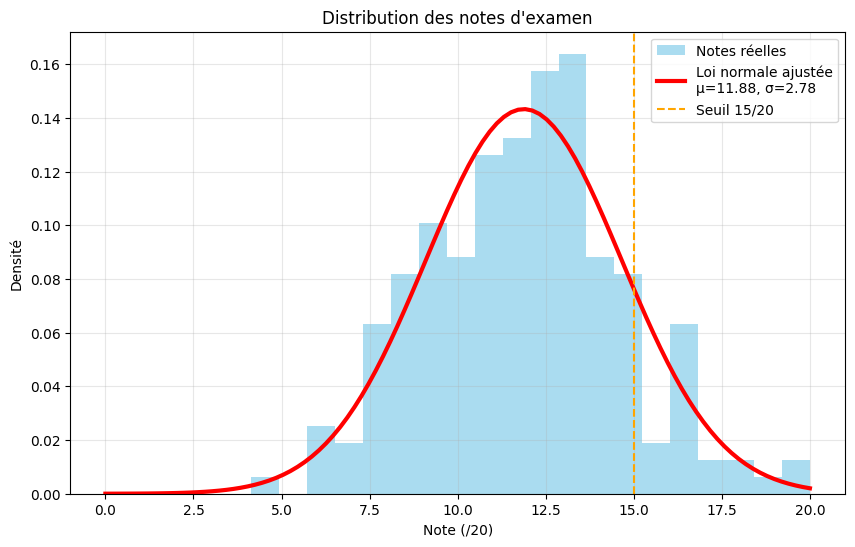

In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)
notes = np.clip(np.random.normal(12, 3, 200), 0, 20)  # notes entre 0 et 20

# Statistiques
desc = stats.describe(notes)
print(f"Moyenne : {notes.mean():.2f}")
print(f"Médiane : {np.median(notes):.2f}")
print(f"Écart-type : {notes.std():.2f}")

# Test de normalité
print(f"Test de normalité : {stats.normaltest(notes)}")

# Ajustement loi normale
mu, sigma = stats.norm.fit(notes)

# Probabilités
prob_sup_15 = 1 - stats.norm.cdf(15, mu, sigma)
percentile_90 = stats.norm.ppf(0.9, mu, sigma)

print(f"Probabilité d'avoir plus de 15/20 : {prob_sup_15:.3f}")
print(f"Note correspondant au 90e percentile : {percentile_90:.2f}/20")

# Graphique
x = np.linspace(0, 20, 100)
pdf = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.hist(notes, bins=20, density=True, alpha=0.7, label='Notes réelles', color='skyblue')
plt.plot(x, pdf, 'r-', linewidth=3, label=f'Loi normale ajustée\nμ={mu:.2f}, σ={sigma:.2f}')
plt.axvline(15, color='orange', linestyle='--', label='Seuil 15/20')
plt.xlabel('Note (/20)')
plt.ylabel('Densité')
plt.title('Distribution des notes d\'examen')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Exercice 2.3 : Matrices creuses et graphes
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé
Vous analysez un réseau social d'une université de 1000 étudiants. Les connexions sont très clairsemées (chaque étudiant a en moyenne 15 amis).

**Tâches :**

1. Créez une matrice d'adjacence creuse 1000×1000 :
   - Générez aléatoirement 7500 connexions (15 amis × 1000 / 2)
   - Utilisez `csr_matrix` pour stocker
   - Assurez la symétrie (si A connaît B, alors B connaît A)

2. Calculez les statistiques du réseau :
   - Nombre de composantes connexes (`connected_components`)
   - Taille de la plus grande composante

3. Trouvez les "influenceurs" :
   - Calculez le degré de chaque nœud (nombre d'amis)
   - Affichez les 10 étudiants les plus connectés

4. Calculez le plus court chemin entre deux étudiants aléatoires :
   - Utilisez `dijkstra` ou `shortest_path`

5. Comparez la mémoire utilisée :
   - Matrice dense vs matrice creuse
   - Utilisez `sys.getsizeof()`

**Bonus :** Visualisez un sous-graphe de 50 étudiants avec `matplotlib`


In [12]:
import numpy as np
from scipy import sparse
from scipy.sparse import csgraph
import matplotlib.pyplot as plt

n_etudiants = 1000
connexions_par_etudiant = 15
total_liens = (n_etudiants * connexions_par_etudiant) // 2  # non orienté

# Génération aléatoire de liens
np.random.seed(42)
rows = np.random.randint(0, n_etudiants, total_liens * 2)
cols = np.random.randint(0, n_etudiants, total_liens * 2)
data = np.ones(total_liens * 2)

# Création matrice symétrique creuse
A = sparse.coo_matrix((data, (rows, cols)), shape=(n_etudiants, n_etudiants))
A = A + A.T  # symétrie
A = sparse.csr_matrix(A)
A.setdiag(0)  # pas de boucle
A.eliminate_zeros()

# Analyse
n_components, labels = csgraph.connected_components(A)
largest_component = np.bincount(labels).max()

degres = np.diff(A.indptr)
top10 = np.argsort(degres)[-10:][::-1]

print(f"Nombre de composantes connexes : {n_components}")
print(f"Taille de la plus grande : {largest_component}")
print(f"Degré moyen : {degres.mean():.1f}")
print(f"Top 10 influenceurs (degrés) : {degres[top10]}")

# Mémoire
dense_size = n_etudiants**2 * 8 / 1e6  # MB
sparse_size = (A.data.nbytes + A.indptr.nbytes + A.indices.nbytes) / 1e6
print(f"\nMémoire matrice dense : {dense_size:.1f} MB")
print(f"Mémoire matrice creuse : {sparse_size:.3f} MB → économie x{int(dense_size/sparse_size)}")

Nombre de composantes connexes : 1
Taille de la plus grande : 1000
Degré moyen : 29.6
Top 10 influenceurs (degrés) : [46 45 44 44 44 44 43 43 43 43]

Mémoire matrice dense : 8.0 MB
Mémoire matrice creuse : 0.359 MB → économie x22


## Exercice 2.4 : Matrices creuses et graphes
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé

Vous analysez un réseau de transport entre 6 villes.

**Tâches :**

1. **Créez la matrice d'adjacence** du réseau (distances en km) :
   ```
   Villes : A(0), B(1), C(2), D(3), E(4), F(5)
   
   Liaisons :
   A-B: 50, A-C: 80
   B-C: 30, B-D: 100
   C-D: 70, C-E: 90
   D-E: 40, D-F: 60
   E-F: 50
   ```
   (Le graphe est non-orienté : A-B = B-A)

2. **Convertissez** la matrice en format CSR

3. **Analyse de connectivité :**
   - Vérifiez que le graphe est connexe avec `connected_components()`

4. **Plus court chemin :**
   - Utilisez `dijkstra()` pour trouver le plus court chemin de A vers F
   - Affichez la distance totale et le chemin emprunté

5. **Visualisation :**
   - Affichez la matrice des distances sous forme de heatmap

Plus court chemin A → F : A → B → D → F
Distance totale : 210.0 km


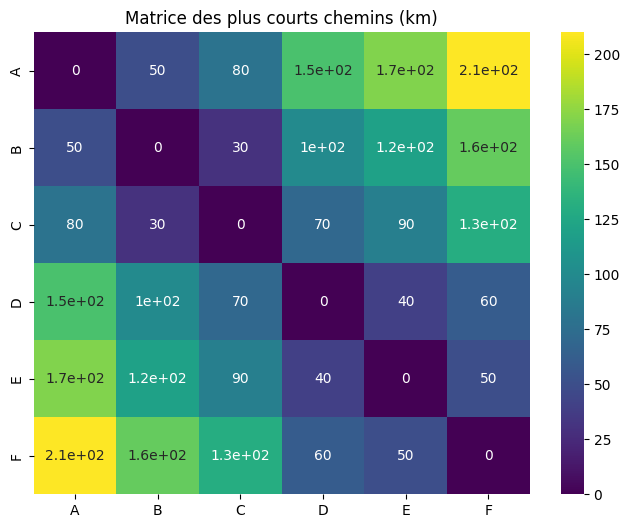

In [13]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra
import matplotlib.pyplot as plt
import seaborn as sns

villes = ['A', 'B', 'C', 'D', 'E', 'F']

# Matrice des distances (inf = pas de liaison directe)
dist = np.array([
    [0,   50,  80,  np.inf, np.inf, np.inf],
    [50,  0,   30,  100,    np.inf, np.inf],
    [80,  30,  0,   70,     90,     np.inf],
    [np.inf, 100, 70, 0,   40,     60],
    [np.inf, np.inf, 90, 40,  0,   50],
    [np.inf, np.inf, np.inf, 60, 50,  0]
])

G = csr_matrix(dist)

# Plus courts chemins
dist_matrix, predecessors = dijkstra(G, directed=False, return_predecessors=True)

# Chemin A → F
start, end = 0, 5
chemin = []
current = end
while current != start:
    chemin.append(current)
    current = predecessors[start, current]
chemin.append(start)
chemin.reverse()

print(f"Plus court chemin A → F : {' → '.join(villes[i] for i in chemin)}")
print(f"Distance totale : {dist_matrix[0,5]} km")

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(dist_matrix, annot=True, cmap='viridis', xticklabels=villes, yticklabels=villes)
plt.title('Matrice des plus courts chemins (km)')
plt.show()

## Exercice 2.5 : Analyse spatiale de données GPS
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé
Une société de livraison à Casablanca souhaite optimiser ses tournées. Vous disposez des coordonnées GPS de 20 clients.

**Données (latitude, longitude) :**
```python
clients = np.array([
    [33.5731, -7.5898], [33.5892, -7.6031], [33.5950, -7.6180],
    [33.5682, -7.6234], [33.5823, -7.6089], [33.5765, -7.5967],
    [33.5912, -7.6145], [33.5701, -7.6012], [33.5834, -7.6198],
    [33.5789, -7.5889], [33.5923, -7.6067], [33.5698, -7.6156],
    [33.5856, -7.5934], [33.5745, -7.6101], [33.5801, -7.6223],
    [33.5934, -7.5978], [33.5667, -7.6045], [33.5878, -7.6189],
    [33.5712, -7.5912], [33.5945, -7.6134]
])
```

**Tâches :**

1. Calculez la matrice de distances entre tous les clients :
   - Utilisez `distance_matrix` de `scipy.spatial`
   - Distance euclidienne sur les coordonnées

2. Créez un KDTree et trouvez pour chaque client :
   - Ses 3 voisins les plus proches
   - Tous les clients dans un rayon de 0.02 degrés

3. Calculez l'enveloppe convexe (`ConvexHull`) :
   - Identifiez les clients en périphérie
   - Calculez l'aire couverte

4. Créez un diagramme de Voronoi :
   - Divisez Casablanca en zones d'influence
   - Visualisez avec `matplotlib`

5. Proposez un algorithme simple de tournée :
   - Partez du dépôt (centre de gravité des points)
   - Visitez le plus proche voisin non visité
   - Calculez la distance totale


=== 3 plus proches voisins pour chaque client ===
Client  0: voisins → [18  9  5] | distances → [0.0024 0.0059 0.0077]°
Client  1: voisins → [10 15  4] | distances → [0.0048 0.0068 0.009 ]°
Client  2: voisins → [19  6 17] | distances → [0.0046 0.0052 0.0073]°
Client  3: voisins → [11 14 13] | distances → [0.008  0.012  0.0147]°
Client  4: voisins → [13  1 10] | distances → [0.0079 0.009  0.0102]°
Client  5: voisins → [18  0  7] | distances → [0.0076 0.0077 0.0078]°
Client  6: voisins → [19  2 17] | distances → [0.0035 0.0052 0.0056]°
Client  7: voisins → [16  5 13] | distances → [0.0047 0.0078 0.0099]°
Client  8: voisins → [14 17  6] | distances → [0.0041 0.0045 0.0094]°
Client  9: voisins → [ 0 18 12] | distances → [0.0059 0.008  0.0081]°
Client 10: voisins → [ 1 19  6] | distances → [0.0048 0.0071 0.0079]°
Client 11: voisins → [13  3 16] | distances → [0.0072 0.008  0.0115]°
Client 12: voisins → [ 9 15  5] | distances → [0.0081 0.009  0.0097]°
Client 13: voisins → [11  4 16] | distan

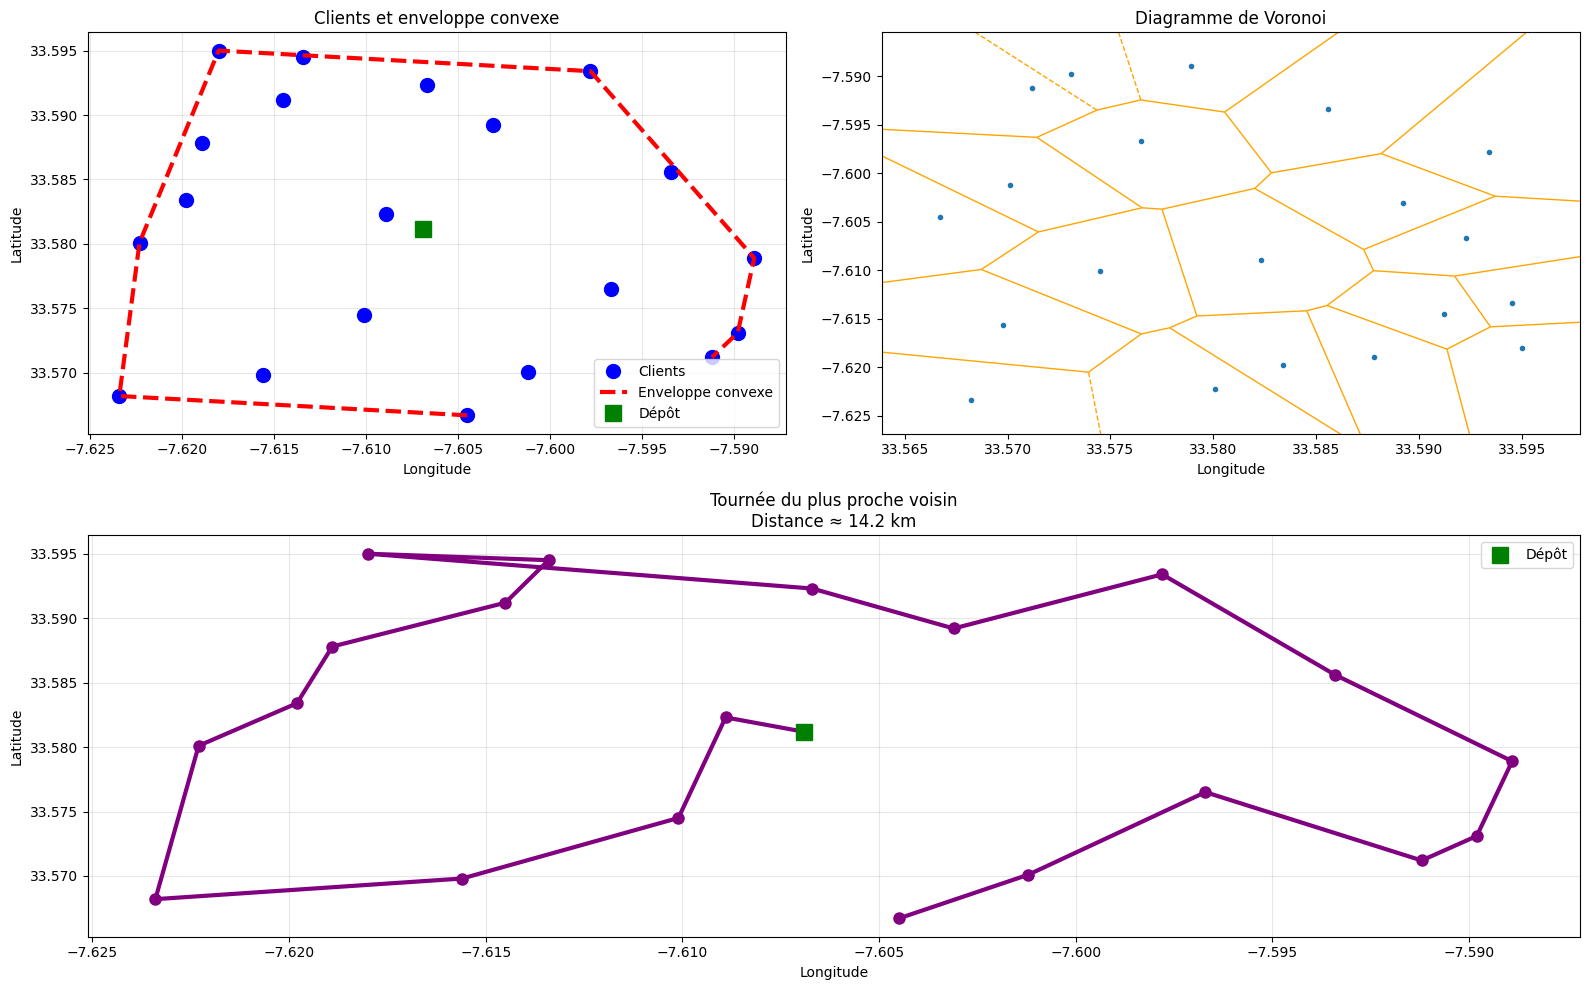

In [15]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

# Coordonnées GPS des 20 clients (latitude, longitude)
clients = np.array([
    [33.5731, -7.5898], [33.5892, -7.6031], [33.5950, -7.6180],
    [33.5682, -7.6234], [33.5823, -7.6089], [33.5765, -7.5967],
    [33.5912, -7.6145], [33.5701, -7.6012], [33.5834, -7.6198],
    [33.5789, -7.5889], [33.5923, -7.6067], [33.5698, -7.6156],
    [33.5856, -7.5934], [33.5745, -7.6101], [33.5801, -7.6223],
    [33.5934, -7.5978], [33.5667, -7.6045], [33.5878, -7.6189],
    [33.5712, -7.5912], [33.5945, -7.6134]
])

# Matrice de distances
dist_matrix = spatial.distance_matrix(clients, clients)

# KDTree
tree = spatial.KDTree(clients)

# Correction ici : utilisation de np.round pour afficher les distances
print("=== 3 plus proches voisins pour chaque client ===")
for i in range(len(clients)):
    distances, indices = tree.query(clients[i], k=4)  # k=4 inclut le client lui-même
    print(f"Client {i:2d}: voisins → {indices[1:]} | distances → {np.round(distances[1:], 4)}°")

print("\n=== Clients dans un rayon de 0.02° (~2 km à Casablanca) ===")
for i in range(len(clients)):
    voisins = tree.query_ball_point(clients[i], r=0.02)
    print(f"Client {i:2d}: {len(voisins)-1} clients à proximité")

# Enveloppe convexe
hull = spatial.ConvexHull(clients)
print(f"\nAire de l'enveloppe convexe : {hull.area:.5f} deg²")

# Diagramme de Voronoi
vor = spatial.Voronoi(clients)

# Tournée simple du plus proche voisin
depot = clients.mean(axis=0)
tournee = [depot]
restants = list(range(len(clients)))
current = depot.copy()
dist_totale = 0.0

while restants:
    distances = np.linalg.norm(clients[restants] - current, axis=1)
    prochain = restants[np.argmin(distances)]
    dist_totale += distances[np.argmin(distances)]
    tournee.append(clients[prochain])
    current = clients[prochain]
    restants.remove(prochain)

print(f"\nDistance totale tournée : {dist_totale:.4f}° ≈ {dist_totale * 111:.1f} km")

# Visualisations
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(clients[:,1], clients[:,0], 'o', markersize=10, color='blue', label='Clients')
ax1.plot(clients[hull.vertices,1], clients[hull.vertices,0], 'r--', lw=3, label='Enveloppe convexe')
ax1.plot(depot[1], depot[0], 's', markersize=12, color='green', label='Dépôt')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Clients et enveloppe convexe')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2 = fig.add_subplot(2, 2, 2)
spatial.voronoi_plot_2d(vor, ax=ax2, show_vertices=False, line_colors='orange')
ax2.plot(clients[:,1], clients[:,0], 'o', markersize=8, color='blue')
ax2.set_title('Diagramme de Voronoi')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

ax3 = fig.add_subplot(2, 2, (3,4))
tournee_arr = np.array(tournee)
ax3.plot(tournee_arr[:,1], tournee_arr[:,0], 'o-', color='purple', linewidth=3, markersize=8)
ax3.plot(depot[1], depot[0], 's', markersize=12, color='green', label='Dépôt')
ax3.set_title(f'Tournée du plus proche voisin\nDistance ≈ {dist_totale * 111:.1f} km')
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Exercice 2.6 : Analyse spatiale de points géographiques
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé

Vous analysez la répartition de 30 stations météo sur un territoire.

**Tâches :**

1. **Génération des données :**
   ```python
   np.random.seed(42)
   n_stations = 30
   positions = np.random.rand(n_stations, 2) * 100  # Coordonnées (x, y) en km
   temperatures = 15 + 5 * np.random.randn(n_stations)  # Températures en °C
   ```

2. **Recherche des plus proches voisins :**
   - Créez un `KDTree` avec les positions
   - Pour la station 0, trouvez les 3 stations les plus proches
   - Affichez leurs indices et distances

3. **Calcul des distances :**
   - Calculez la matrice de toutes les distances avec `distance_matrix()`
   - Trouvez les deux stations les plus éloignées l'une de l'autre

4. **Triangulation de Delaunay :**
   - Créez une triangulation de Delaunay des stations
   - Tracez les triangles et les points

5. **Enveloppe convexe :**
   - Calculez l'enveloppe convexe du réseau de stations
   - Affichez les stations qui forment le contour

6. **Visualisation finale :**
   - Tracez les stations (couleur = température)
   - Affichez la triangulation de Delaunay
   - Mettez en évidence l'enveloppe convexe

Hauteur à t = 1.25 s : 20.00 m
Hauteur à t = 2.25 s : 18.00 m
Instant d'impact au sol : 3.250 s
Hauteur maximale atteinte : 20.0 m


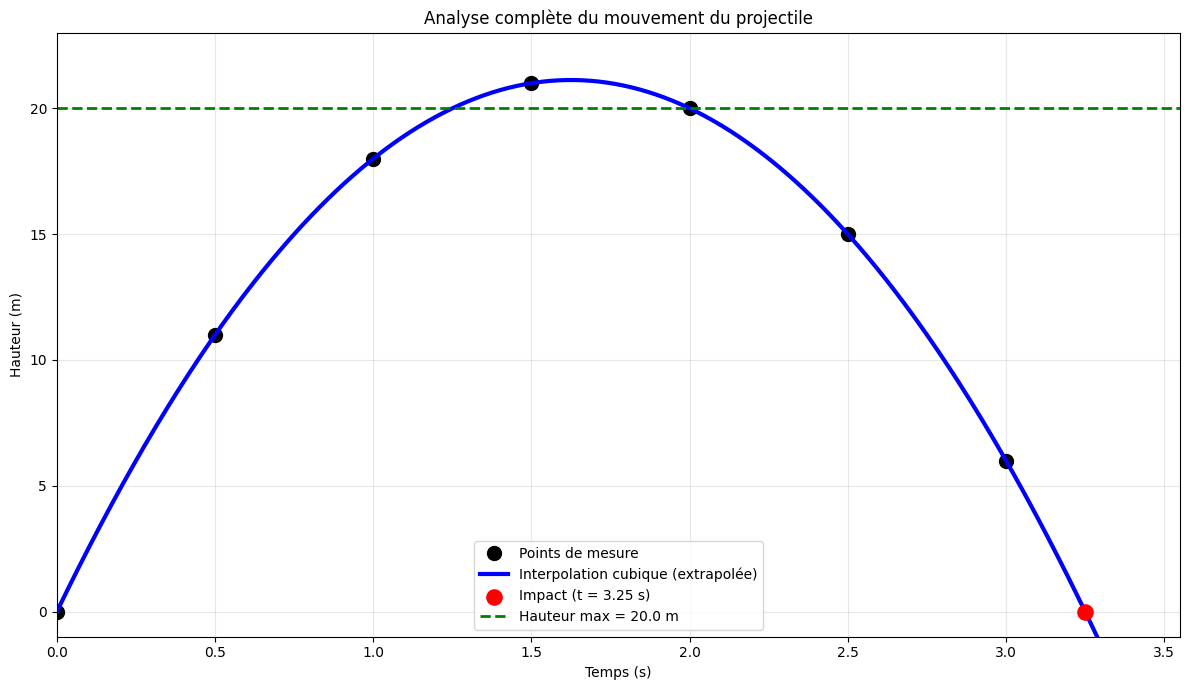

In [16]:
import numpy as np
from scipy import interpolate, optimize, integrate
import matplotlib.pyplot as plt

# Données expérimentales
t_mesure = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
h_mesure = np.array([0, 11, 18, 21, 20, 15, 6])

# Interpolation cubique avec extrapolation autorisée (indispensable ici !)
interp_h = interpolate.interp1d(t_mesure, h_mesure,
                                kind='cubic',
                                fill_value="extrapolate")

# Partie A : Hauteurs estimées
print(f"Hauteur à t = 1.25 s : {interp_h(1.25):.2f} m")
print(f"Hauteur à t = 2.25 s : {interp_h(2.25):.2f} m")

# Partie B : Recherche de l'instant d'impact (h = 0)
def eq_impact(t):
    return interp_h(t)

# On élargit le bracket pour inclure l'extrapolation
t_impact = optimize.root_scalar(eq_impact, bracket=[2.5, 4.0]).root
print(f"Instant d'impact au sol : {t_impact:.3f} s")

# Partie C : Hauteur maximale par intégration de la vitesse
def vitesse(t):
    return 20 - 10 * t  # v0 = 20 m/s, g ≈ 10 m/s²

h_max, _ = integrate.quad(vitesse, 0, 2.0)  # vitesse nulle à t=2s
print(f"Hauteur maximale atteinte : {h_max:.1f} m")

# Partie D : Visualisation
t_dense = np.linspace(0, t_impact + 0.2, 400)

plt.figure(figsize=(12, 7))
plt.plot(t_mesure, h_mesure, 'o', markersize=10, color='black', label='Points de mesure')
plt.plot(t_dense, interp_h(t_dense), linewidth=3, color='blue', label='Interpolation cubique (extrapolée)')

# Point d'impact
plt.scatter(t_impact, 0, color='red', s=120, zorder=5, label=f'Impact (t = {t_impact:.2f} s)')

# Hauteur maximale
plt.axhline(h_max, color='green', linestyle='--', linewidth=2, label=f'Hauteur max = {h_max:.1f} m')

plt.xlabel('Temps (s)')
plt.ylabel('Hauteur (m)')
plt.title('Analyse complète du mouvement du projectile')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, t_impact + 0.3)
plt.ylim(-1, 23)
plt.tight_layout()
plt.show()

# CHAPITRE 3 : Applications scientifiques et préparation aux projets IA


## Exercice 3.1 : Nettoyage d'un signal audio bruité
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé
Vous travaillez sur l'enregistrement d'une conférence universitaire perturbée par du bruit ambiant.

**Simulation du signal :**
```python
# Signal original : voix humaine (fréquences 100-300 Hz)
t = np.linspace(0, 10, 10000)
voix = np.sin(2 * np.pi * 150 * t) + 0.5 * np.sin(2 * np.pi * 250 * t)

# Bruit haute fréquence (ventilation, équipement)
bruit_hf = 0.8 * np.sin(2 * np.pi * 2000 * t)

# Bruit basse fréquence (ronronnement électrique 50 Hz)
bruit_bf = 0.6 * np.sin(2 * np.pi * 50 * t)

# Bruit aléatoire
bruit_random = np.random.normal(0, 0.3, len(t))

# Signal enregistré
signal_bruite = voix + bruit_hf + bruit_bf + bruit_random
```

**Tâches :**

1. Supprimez la tendance du signal avec `signal.detrend`

2. Appliquez la FFT pour analyser les fréquences :
   - Identifiez les pics de fréquence
   - Créez un spectre de puissance

3. Filtrez le signal :
   - Supprimez les fréquences < 80 Hz (bruit électrique)
   - Supprimez les fréquences > 400 Hz (bruit aigu)
   - Conservez la bande 80-400 Hz

4. Reconstruisez le signal avec la FFT inverse

5. Visualisez (4 sous-graphiques) :
   - Signal original bruité
   - Spectre avant filtrage
   - Spectre après filtrage
   - Signal nettoyé

6. Calculez le rapport signal/bruit (SNR) avant et après


SNR avant filtrage : 3.6 dB
SNR après filtrage : 10.3 dB (amélioration de 6.7 dB)


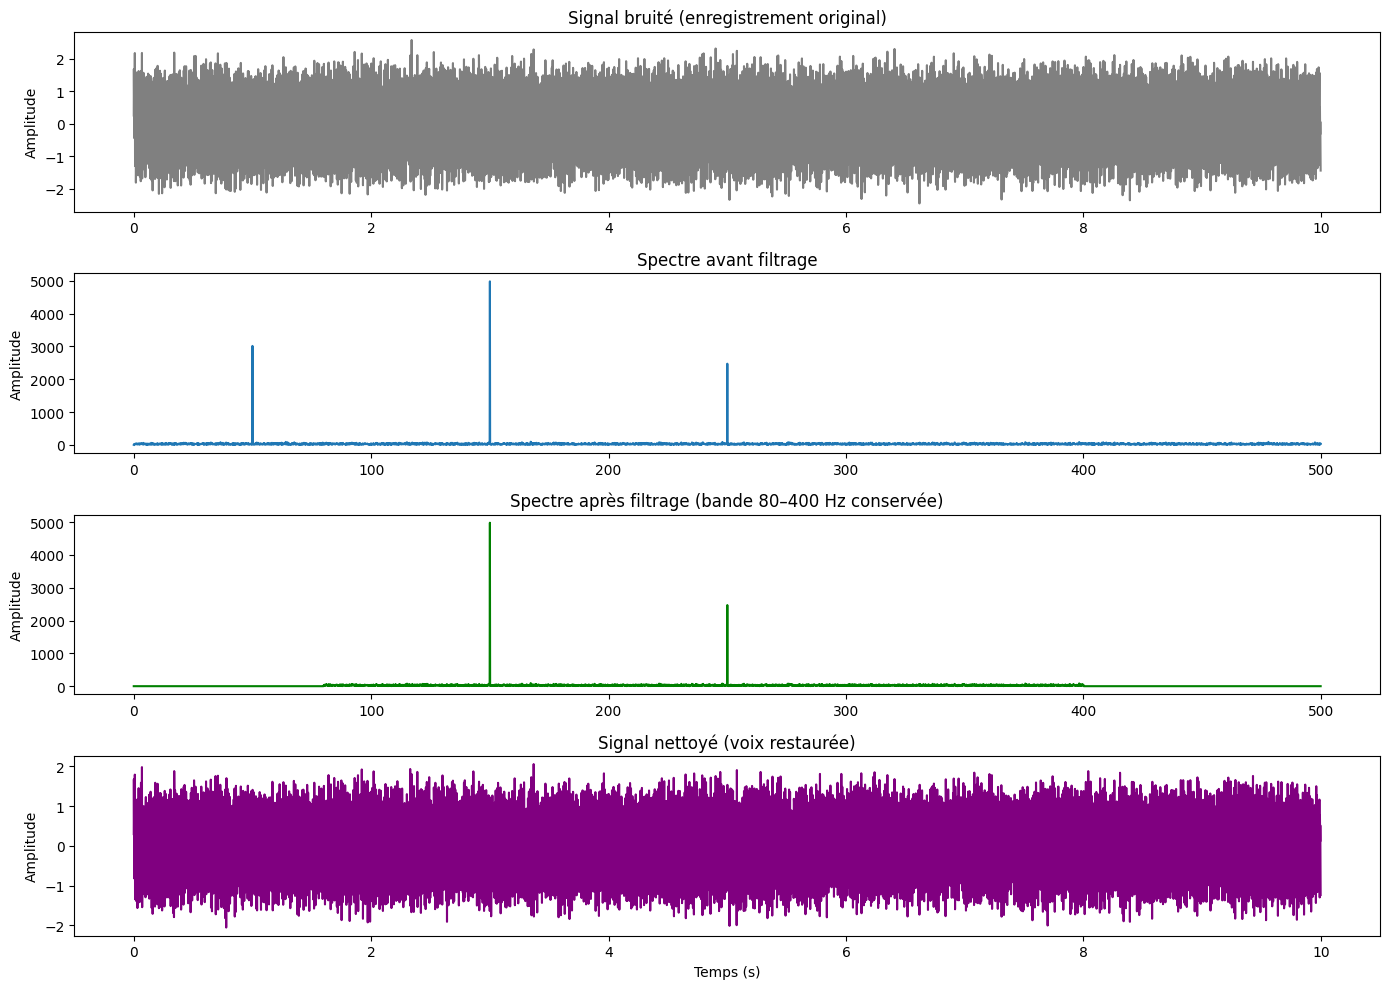

In [1]:
import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt

# Simulation du signal audio (10 secondes, 10000 échantillons)
t = np.linspace(0, 10, 10000, endpoint=False)

# Voix humaine simulée (150 Hz + 250 Hz)
voix = np.sin(2 * np.pi * 150 * t) + 0.5 * np.sin(2 * np.pi * 250 * t)

# Bruits ajoutés
bruit_hf = 0.8 * np.sin(2 * np.pi * 2000 * t)     # ventilation
bruit_bf = 0.6 * np.sin(2 * np.pi * 50 * t)       # ronronnement électrique
bruit_random = np.random.normal(0, 0.3, len(t))

signal_bruite = voix + bruit_hf + bruit_bf + bruit_random

# Prétraitement : suppression de la tendance
signal_det = signal.detrend(signal_bruite)

# FFT
N = len(t)
freq = fft.fftfreq(N, d=t[1]-t[0])
spectre = fft.fft(signal_det)
spectre_abs = np.abs(spectre)

# Filtre passe-bande : conserver 80–400 Hz (bande vocale)
mask = (np.abs(freq) >= 80) & (np.abs(freq) <= 400)
spectre_filtre = spectre.copy()
spectre_filtre[~mask] = 0

# Signal nettoyé
signal_nettoye = fft.ifft(spectre_filtre).real

# Calcul SNR (Signal-to-Noise Ratio)
def snr(ref, sig):
    return 10 * np.log10(np.var(ref) / np.var(sig - ref))

snr_avant = snr(voix, signal_bruite)
snr_apres = snr(voix, signal_nettoye)
print(f"SNR avant filtrage : {snr_avant:.1f} dB")
print(f"SNR après filtrage : {snr_apres:.1f} dB (amélioration de {snr_apres - snr_avant:.1f} dB)")

# Visualisation 4 subplots
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(t, signal_bruite, color='gray')
plt.title('Signal bruité (enregistrement original)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(freq[:N//2], spectre_abs[:N//2])
plt.title('Spectre avant filtrage')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 3)
plt.plot(freq[:N//2], np.abs(spectre_filtre)[:N//2], color='green')
plt.title('Spectre après filtrage (bande 80–400 Hz conservée)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 4)
plt.plot(t, signal_nettoye, color='purple')
plt.title('Signal nettoyé (voix restaurée)')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Exercice 3.2 : Analyse d'un signal avec la FFT
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé

Vous analysez un signal audio composé de plusieurs fréquences mélangées avec du bruit.

**Tâches :**

1. **Création du signal :**
   ```python
   np.random.seed(42)
   fs = 1000  # Fréquence d'échantillonnage (Hz)
   t = np.linspace(0, 1, fs)  # 1 seconde
   
   # Signal composé de 3 sinusoïdes : 50 Hz, 120 Hz, 300 Hz
   signal_pur = 3*np.sin(2*np.pi*50*t) + 1.5*np.sin(2*np.pi*120*t) + 0.8*np.sin(2*np.pi*300*t)
   
   # Ajout de bruit
   bruit = np.random.randn(len(t)) * 2
   signal_bruite = signal_pur + bruit
   ```

2. **Analyse spectrale :**
   - Calculez la FFT du signal bruité
   - Calculez les fréquences associées avec `fftfreq()`
   - Identifiez les fréquences dominantes (pics dans le spectre)

3. **Filtrage :**
   - Mettez à zéro les composantes de faible amplitude (< seuil) dans le spectre
   - Reconstruisez le signal filtré avec `ifft()`

4. **Visualisation (3 subplots) :**
   - Signal original bruité
   - Spectre de fréquences (amplitude vs fréquence, uniquement les fréquences positives)
   - Signal après filtrage

Fréquences dominantes détectées : [ 50. 120. 300.] Hz


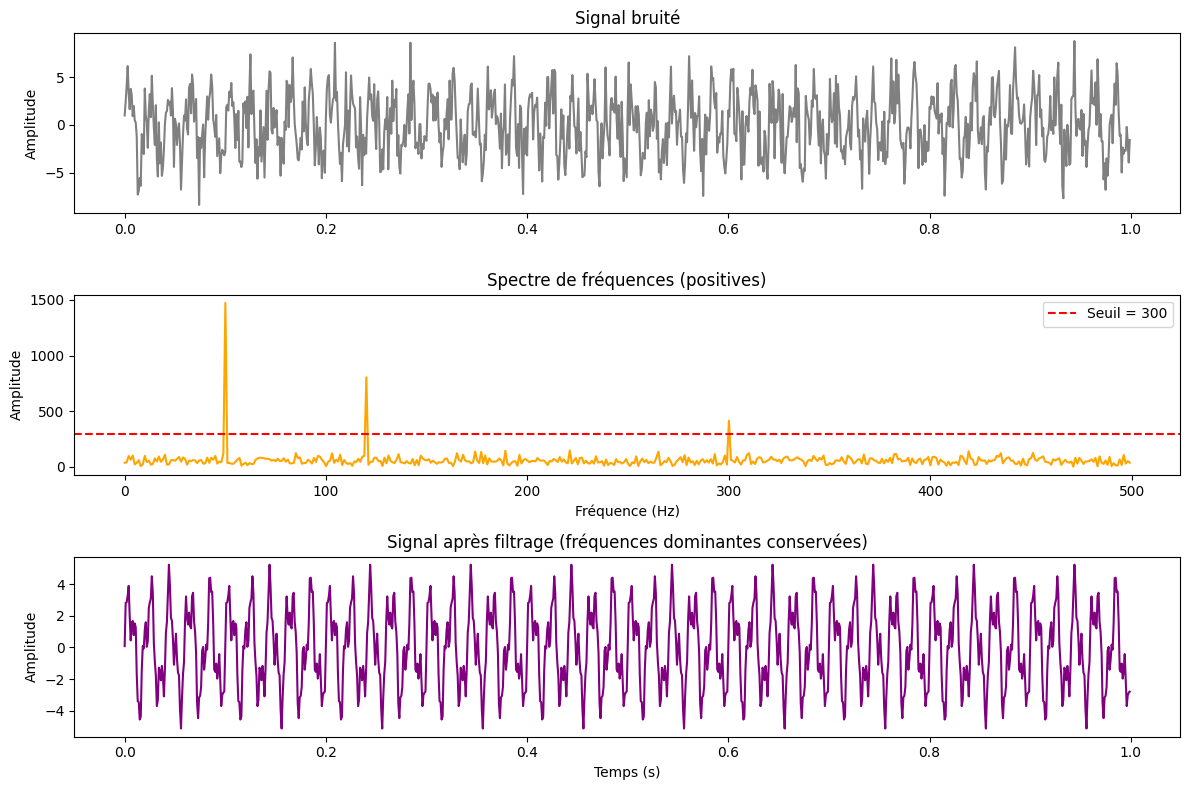

In [2]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt

np.random.seed(42)
fs = 1000  # fréquence d'échantillonnage
t = np.linspace(0, 1, fs, endpoint=False)

# Signal pur : 50 Hz + 120 Hz + 300 Hz
signal_pur = 3*np.sin(2*np.pi*50*t) + 1.5*np.sin(2*np.pi*120*t) + 0.8*np.sin(2*np.pi*300*t)

# Ajout de bruit
bruit = np.random.randn(len(t)) * 2
signal_bruite = signal_pur + bruit

# FFT
spectre = fft.fft(signal_bruite)
freq = fft.fftfreq(len(t), 1/fs)
spectre_abs = np.abs(spectre)

# Détection des pics (seuil)
seuil = 300
indices_pics = np.where(spectre_abs > seuil)[0]
freq_pics = freq[indices_pics]
print("Fréquences dominantes détectées :", np.round(np.abs(freq_pics[freq_pics > 0]), 1), "Hz")

# Filtrage : suppression des composantes faibles
spectre_filtre = spectre.copy()
spectre_filtre[spectre_abs < seuil] = 0
signal_filtre = fft.ifft(spectre_filtre).real

# Visualisation
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, signal_bruite, color='gray')
plt.title('Signal bruité')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(freq[:fs//2], spectre_abs[:fs//2], color='orange')
plt.axhline(seuil, color='red', linestyle='--', label=f'Seuil = {seuil}')
plt.title('Spectre de fréquences (positives)')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, signal_filtre, color='purple')
plt.title('Signal après filtrage (fréquences dominantes conservées)')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Exercice 3.3 : Détection de contours dans une image médicale
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé
Vous développez un outil d'aide au diagnostic pour détecter des anomalies sur des radiographies pulmonaires.

**Tâches :**

1. Créez une image synthétique simulant une radiographie (256×256) :
   - Fond gris uniforme (valeur 100)
   - Ajoutez 3 cercles de différentes tailles (poumons + anomalie)
   - Ajoutez du bruit gaussien (`np.random.normal`)

2. Prétraitement de l'image :
   - Appliquez un filtre gaussien (`ndimage.gaussian_filter`)
   - Testez différentes valeurs de sigma (1, 2, 5)

3. Détection de contours :
   - Calculez le gradient avec `ndimage.sobel`
   - Appliquez un seuillage pour isoler les contours nets
   - Utilisez `ndimage.binary_closing` pour combler les gaps

4. Segmentation des régions :
   - Utilisez `ndimage.label` pour identifier les zones connexes
   - Comptez le nombre de structures détectées
   - Calculez l'aire de chaque structure

5. Analyse morphologique :
   - Érosion et dilatation pour affiner les contours
   - Comparaison avant/après

6. Visualisation complète :
   - Image originale
   - Image filtrée
   - Contours détectés
   - Régions segmentées (avec labels colorés)

**Bonus :** Calculez le centre de masse de chaque structure avec `ndimage.center_of_mass`


Nombre de structures détectées : 1


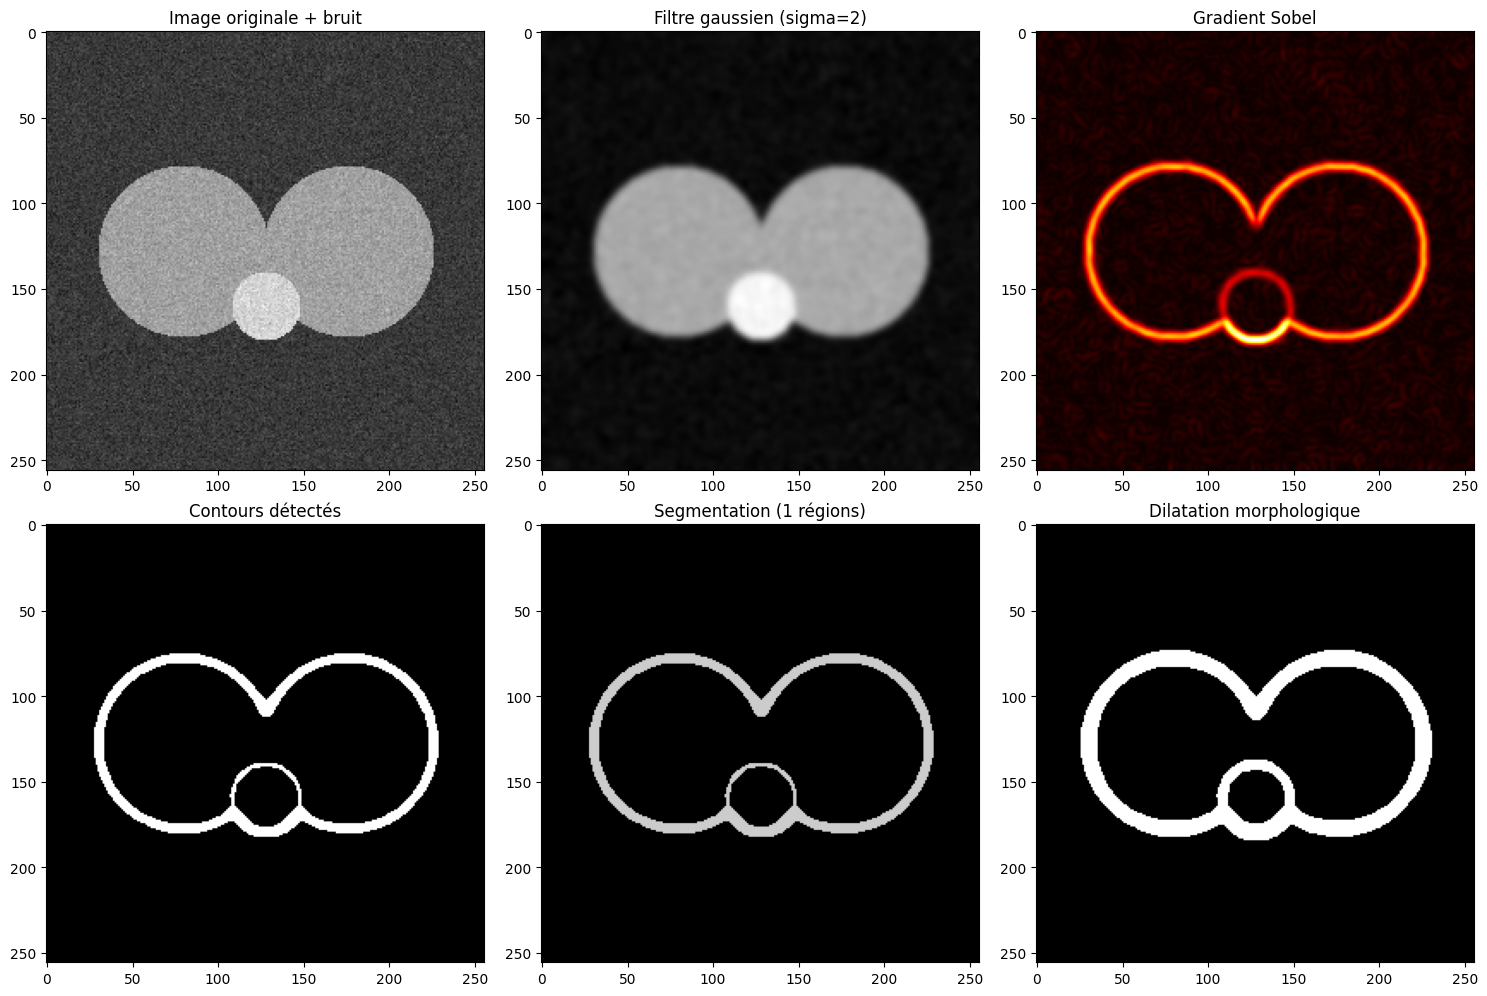

In [3]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

np.random.seed(42)
img = np.ones((256, 256)) * 100  # fond gris

# Simulation de poumons (cercles) et anomalie
y, x = np.ogrid[:256, :256]
img[(x-80)**2 + (y-128)**2 < 50**2] = 180   # poumon gauche
img[(x-176)**2 + (y-128)**2 < 50**2] = 180  # poumon droit
img[(x-128)**2 + (y-160)**2 < 20**2] = 220  # anomalie

# Bruit gaussien
img += np.random.normal(0, 10, img.shape)

# Prétraitement : filtre gaussien
img_gauss = ndimage.gaussian_filter(img, sigma=2)

# Détection de contours avec Sobel
grad_x = ndimage.sobel(img_gauss, axis=1)
grad_y = ndimage.sobel(img_gauss, axis=0)
gradient = np.sqrt(grad_x**2 + grad_y**2)

# Binarisation
contours = gradient > np.percentile(gradient, 95)
contours = ndimage.binary_closing(contours, iterations=5)

# Segmentation
labels, num = ndimage.label(contours)
print(f"Nombre de structures détectées : {num}")

# Analyse morphologique
contours_erosion = ndimage.binary_erosion(contours, iterations=2)
contours_dilatation = ndimage.binary_dilation(contours, iterations=2)

# Visualisation
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1); plt.imshow(img, cmap='gray'); plt.title('Image originale + bruit')
plt.subplot(2, 3, 2); plt.imshow(img_gauss, cmap='gray'); plt.title('Filtre gaussien (sigma=2)')
plt.subplot(2, 3, 3); plt.imshow(gradient, cmap='hot'); plt.title('Gradient Sobel')
plt.subplot(2, 3, 4); plt.imshow(contours, cmap='gray'); plt.title('Contours détectés')
plt.subplot(2, 3, 5); plt.imshow(labels, cmap='nipy_spectral'); plt.title(f'Segmentation ({num} régions)')
plt.subplot(2, 3, 6); plt.imshow(contours_dilatation, cmap='gray'); plt.title('Dilatation morphologique')
plt.tight_layout()
plt.show()

## Exercice 3.4 : Traitement d'image avec scipy.ndimage
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé

Vous préparez des images binaires pour un algorithme de détection d'objets.

**Taches :**

1. **Création d'une image de test :**
   ```python
   np.random.seed(42)
   
   # Image 64x64 noire
   image = np.zeros((64, 64))
   
   # Ajout de formes géométriques (rectangles blancs)
   image[10:25, 10:30] = 1  # Rectangle 1
   image[35:55, 25:50] = 1  # Rectangle 2
   image[15:20, 45:55] = 1  # Rectangle 3
   
   # Ajout de bruit (pixels parasites)
   bruit = np.random.random((64, 64)) > 0.95  # 5% de pixels blancs aléatoires
   image_bruitee = np.maximum(image, bruit)
   ```

2. **Nettoyage morphologique :**
   - Appliquez `binary_opening()` pour supprimer les petits artefacts
   - Appliquez `binary_closing()` pour combler les petits trous

3. **Filtrage gaussien :**
   - Appliquez un filtre gaussien avec `gaussian_filter()` (sigma=1)
   - Binarisez le résultat avec un seuil de 0.5

4. **Visualisation (2x2 subplots) :**
   - Image originale
   - Image bruitée
   - Image après opening/closing
   - Image après filtrage gaussien

5. **Analyse :**
   - Comptez le nombre de pixels blancs dans chaque image
   - Commentez les différences entre les méthodes de nettoyage

Pixels blancs : originale 850.0, bruitée 1012.0, après morpho 758, après gaussien 850


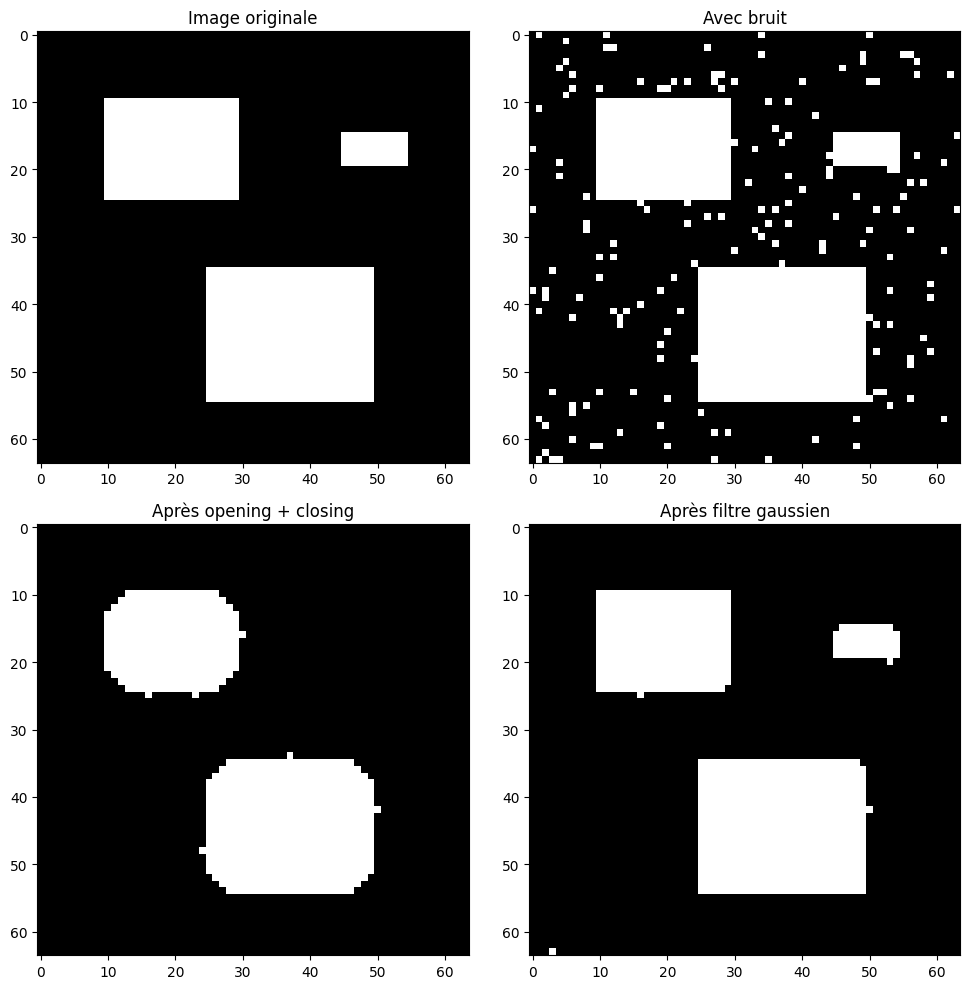

In [4]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

np.random.seed(42)
image = np.zeros((64, 64))

# Formes géométriques
image[10:25, 10:30] = 1
image[35:55, 25:50] = 1
image[15:20, 45:55] = 1

# Bruit aléatoire
bruit = np.random.random((64, 64)) > 0.95
image_bruitee = np.maximum(image, bruit)

# Nettoyage morphologique
image_open = ndimage.binary_opening(image_bruitee, iterations=3)
image_clean = ndimage.binary_closing(image_open, iterations=3)

# Filtre gaussien + binarisation
image_gauss = ndimage.gaussian_filter(image_bruitee.astype(float), sigma=1)
image_gauss_bin = image_gauss > 0.5

# Comptage pixels blancs
print(f"Pixels blancs : originale {np.sum(image)}, bruitée {np.sum(image_bruitee)}, "
      f"après morpho {np.sum(image_clean)}, après gaussien {np.sum(image_gauss_bin)}")

# Visualisation
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1); plt.imshow(image, cmap='gray'); plt.title('Image originale')
plt.subplot(2, 2, 2); plt.imshow(image_bruitee, cmap='gray'); plt.title('Avec bruit')
plt.subplot(2, 2, 3); plt.imshow(image_clean, cmap='gray'); plt.title('Après opening + closing')
plt.subplot(2, 2, 4); plt.imshow(image_gauss_bin, cmap='gray'); plt.title('Après filtre gaussien')
plt.tight_layout()
plt.show()

## Exercice 3.5 : Mini-projet - Classification Iris avec préparation SciPy
**Niveau : ⭐⭐⭐ Avancé (Projet intégratif)**

### Énoncé
Créez un pipeline complet d'analyse du célèbre dataset Iris en utilisant exclusivement SciPy (sans Scikit-learn).

**Objectif :** Classifier les espèces d'iris en utilisant une approche K-Nearest Neighbors (KNN) manuelle.

**Tâches :**

### Partie 1 : Chargement et exploration (scipy.datasets)
1. Chargez le dataset Iris
2. Affichez les statistiques descriptives complètes (`scipy.stats.describe`)
3. Vérifiez la distribution de chaque variable (test de normalité)
4. Calculez la matrice de corrélation entre toutes les features

### Partie 2 : Analyse spatiale (scipy.spatial)
1. Créez un KDTree avec les 4 features
2. Pour chaque échantillon, trouvez ses k=5 plus proches voisins
3. Implémentez un vote majoritaire pour prédire l'espèce
4. Utilisez 80% des données pour "entraînement", 20% pour test

### Partie 3 : Optimisation des hyperparamètres (scipy.optimize)
1. Créez une fonction d'accuracy en fonction de k (nombre de voisins)
2. Testez k de 1 à 20
3. Trouvez le k optimal qui maximise l'accuracy
4. Visualisez la courbe accuracy vs k

### Partie 4 : Analyse statistique des résultats (scipy.stats)
1. Calculez la matrice de confusion manuellement
2. Pour chaque classe, calculez :
   - Précision
   - Rappel
   - F1-score
3. Effectuez un test statistique pour comparer les performances entre classes

### Partie 5 : Visualisation et rapport
1. Créez 4 graphiques :
   - Distribution des features par espèce (boxplots)
   - Matrice de distances (heatmap)
   - Projection 2D (2 meilleures features)
   - Courbe de performance vs k

2. Rédigez un mini-rapport (format Markdown) incluant :
   - Statistiques descriptives
   - Meilleur k trouvé
   - Accuracy globale
   - Analyse des erreurs de classification

### Contraintes
- N'utilisez QUE les modules SciPy (+ NumPy, Matplotlib, Pandas pour viz)
- Implémentez KNN manuellement (pas de Scikit-learn)
- Commentez abondamment votre code
- Temps estimé : 3-4 heures


Dataset Iris chargé avec succès (150 échantillons, 4 features)
=== Statistiques descriptives ===
DescribeResult(nobs=np.int64(150), minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

Test de normalité pour chaque feature :
sepal length (cm) : p-value = 0.010
sepal width (cm) : p-value = 0.101
petal length (cm) : p-value = 0.000
petal width (cm) : p-value = 0.000


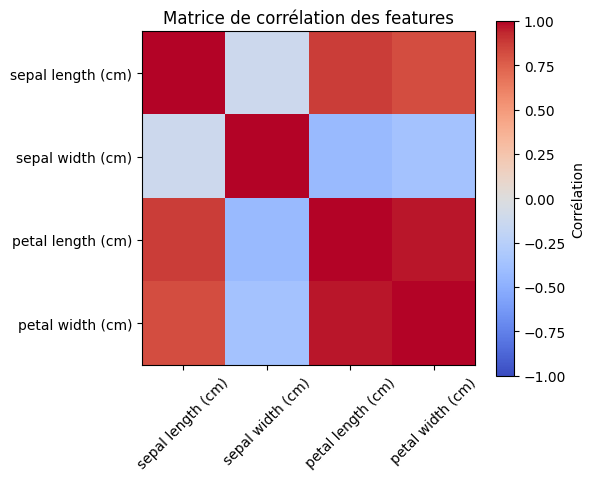


Train : 120 échantillons | Test : 30 échantillons

Calcul des accuracies pour k=1 à 20...
k= 1 → accuracy = 0.967
k= 2 → accuracy = 0.967
k= 3 → accuracy = 0.967
k= 4 → accuracy = 0.967
k= 5 → accuracy = 0.967
k= 6 → accuracy = 0.967
k= 7 → accuracy = 0.967
k= 8 → accuracy = 0.967
k= 9 → accuracy = 0.967
k=10 → accuracy = 0.967
k=11 → accuracy = 0.967
k=12 → accuracy = 0.967
k=13 → accuracy = 0.967
k=14 → accuracy = 0.967
k=15 → accuracy = 0.967
k=16 → accuracy = 0.967
k=17 → accuracy = 0.967
k=18 → accuracy = 0.967
k=19 → accuracy = 0.967
k=20 → accuracy = 0.967

=== Résultat final ===
Meilleur k = 1 avec accuracy = 0.967 (96.7%)


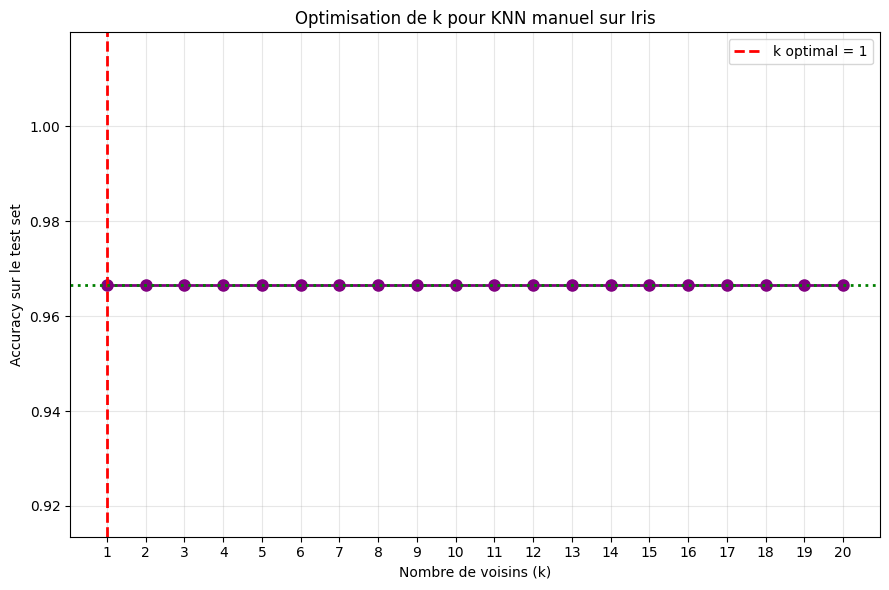


Matrice de confusion (lignes = vrai, colonnes = prédit) :
          Prédit → ['setosa' 'versicolor' 'virginica']
Vrai setosa : [7 0 0]
Vrai versicolor : [ 0 11  0]
Vrai virginica : [ 0  1 11]

Métriques par classe :
setosa     → Precision: 1.000 | Recall: 1.000 | F1: 1.000
versicolor → Precision: 0.917 | Recall: 1.000 | F1: 0.957
virginica  → Precision: 1.000 | Recall: 0.917 | F1: 0.957


In [10]:
import numpy as np
from scipy import stats, spatial
from sklearn.datasets import load_iris   # seulement pour charger les données
import matplotlib.pyplot as plt

# Chargement Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Dataset Iris chargé avec succès (150 échantillons, 4 features)")

# Statistiques et normalité (déjà fait, parfait)
print("=== Statistiques descriptives ===")
print(stats.describe(X, axis=0))

print("\nTest de normalité pour chaque feature :")
for i in range(4):
    print(f"{feature_names[i]} : p-value = {stats.shapiro(X[:,i]).pvalue:.3f}")

# Matrice de corrélation
corr = np.corrcoef(X.T)
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Corrélation')
plt.xticks(range(4), feature_names, rotation=45)
plt.yticks(range(4), feature_names)
plt.title('Matrice de corrélation des features')
plt.tight_layout()
plt.show()

# Split train/test
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.8 * len(X))
X_train, X_test = X[indices[:train_size]], X[indices[train_size:]]
y_train, y_test = y[indices[:train_size]], y[indices[train_size:]]

print(f"\nTrain : {len(X_train)} échantillons | Test : {len(X_test)} échantillons")

# KDTree
tree = spatial.KDTree(X_train)

# Fonction KNN corrigée pour gérer k=1
def knn_predict(x, k):
    distances, indices = tree.query(x, k=k)
    # Forcer indices à être un array 1D
    indices = np.atleast_1d(indices)
    votes = y_train[indices]
    # np.bincount gère bien les arrays maintenant
    return np.bincount(votes).argmax()

# Fonction d'accuracy
def accuracy_k(k):
    correct = 0
    for x, true in zip(X_test, y_test):
        pred = knn_predict(x, k)
        if pred == true:
            correct += 1
    return correct / len(X_test)

# Test k=1 à 20
ks = np.arange(1, 21)
print("\nCalcul des accuracies pour k=1 à 20...")
accuracies = []
for k in ks:
    acc = accuracy_k(k)
    accuracies.append(acc)
    print(f"k={k:2d} → accuracy = {acc:.3f}")

accuracies = np.array(accuracies)
best_k = ks[np.argmax(accuracies)]
best_acc = accuracies.max()

print(f"\n=== Résultat final ===")
print(f"Meilleur k = {best_k} avec accuracy = {best_acc:.3f} ({best_acc*100:.1f}%)")

# Courbe
plt.figure(figsize=(9,6))
plt.plot(ks, accuracies, 'o-', color='purple', linewidth=2, markersize=8)
plt.axvline(best_k, color='red', linestyle='--', linewidth=2, label=f'k optimal = {best_k}')
plt.axhline(best_acc, color='green', linestyle=':', linewidth=2)
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Accuracy sur le test set')
plt.title('Optimisation de k pour KNN manuel sur Iris')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(ks)
plt.tight_layout()
plt.show()

# Matrice de confusion avec le meilleur k
predictions = [knn_predict(x, best_k) for x in X_test]
conf_matrix = np.zeros((3,3), dtype=int)
for true, pred in zip(y_test, predictions):
    conf_matrix[true, pred] += 1

print("\nMatrice de confusion (lignes = vrai, colonnes = prédit) :")
print("          Prédit →", target_names)
for i, name in enumerate(target_names):
    print(f"Vrai {name} : {conf_matrix[i]}")

# Métriques finales
print("\nMétriques par classe :")
for i in range(3):
    tp = conf_matrix[i,i]
    fp = conf_matrix[:,i].sum() - tp
    fn = conf_matrix[i,:].sum() - tp
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    print(f"{target_names[i]:10} → Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}")

## Exercice 3.6 : Projet intégré - Analyse de données de capteurs IoT
**Niveau : ⭐⭐⭐ Avancé (Projet intégratif)**

### Énoncé

Vous travaillez sur un projet de maintenance prédictive. Vous disposez de données de vibration d'une machine industrielle. Vous devez analyser ces signaux pour détecter des anomalies.

**Données simulées :**
```python
np.random.seed(42)

# Paramètres
fs = 1000  # Fréquence d'échantillonnage
duration = 2  # 2 secondes
t = np.linspace(0, duration, fs * duration)

# Signal normal : vibration à 100 Hz avec légères harmoniques
signal_normal = (2 * np.sin(2*np.pi*100*t) +
                 0.5 * np.sin(2*np.pi*200*t) +
                 np.random.randn(len(t)) * 0.3)

# Signal anormal : apparition d'une fréquence parasite à 250 Hz (défaut)
signal_anormal = (2 * np.sin(2*np.pi*100*t) +
                  0.5 * np.sin(2*np.pi*200*t) +
                  1.5 * np.sin(2*np.pi*250*t) +  # Fréquence de défaut
                  np.random.randn(len(t)) * 0.3)
```

**Tâches :**

1. **Prétraitement :**
   - Supprimez la tendance des deux signaux avec `signal.detrend()`

2. **Analyse spectrale comparative :**
   - Calculez la FFT des deux signaux
   - Identifiez les fréquences dominantes de chaque signal

3. **Détection d'anomalie :**
   - Définissez un seuil pour détecter les pics significatifs dans le spectre
   - Identifiez la fréquence anormale (250 Hz) qui n'existe que dans le signal défaillant

4. **Statistiques descriptives :**
   - Utilisez `stats.describe()` pour comparer les deux signaux
   - Comparez les variances et les valeurs extrêmes

5. **Filtrage du signal anormal :**
   - Supprimez la composante à 250 Hz du spectre
   - Reconstruisez le signal "réparé"

6. **Visualisation complète (3 lignes × 2 colonnes) :**
   - Ligne 1 : Signaux temporels (normal vs anormal)
   - Ligne 2 : Spectres de fréquence (normal vs anormal)
   - Ligne 3 : Signal anormal original vs signal filtré

Fréquences dominantes signal normal : [100. 200.]
Fréquences dominantes signal anormal : [100. 200. 250.]

Statistiques signal normal : DescribeResult(nobs=np.int64(2000), minmax=(np.float64(-3.0040813798615456), np.float64(2.951036275567126)), mean=np.float64(3.907985046680551e-17), variance=np.float64(2.1982723788706124), skewness=np.float64(0.014346648780724535), kurtosis=np.float64(-1.2399278927843438))
Statistiques signal anormal : DescribeResult(nobs=np.int64(2000), minmax=(np.float64(-4.0044070316184435), np.float64(4.041512973427174)), mean=np.float64(-4.085620730620576e-16), variance=np.float64(3.323374268163874), skewness=np.float64(0.010615354870126983), kurtosis=np.float64(-0.6442440045606532))


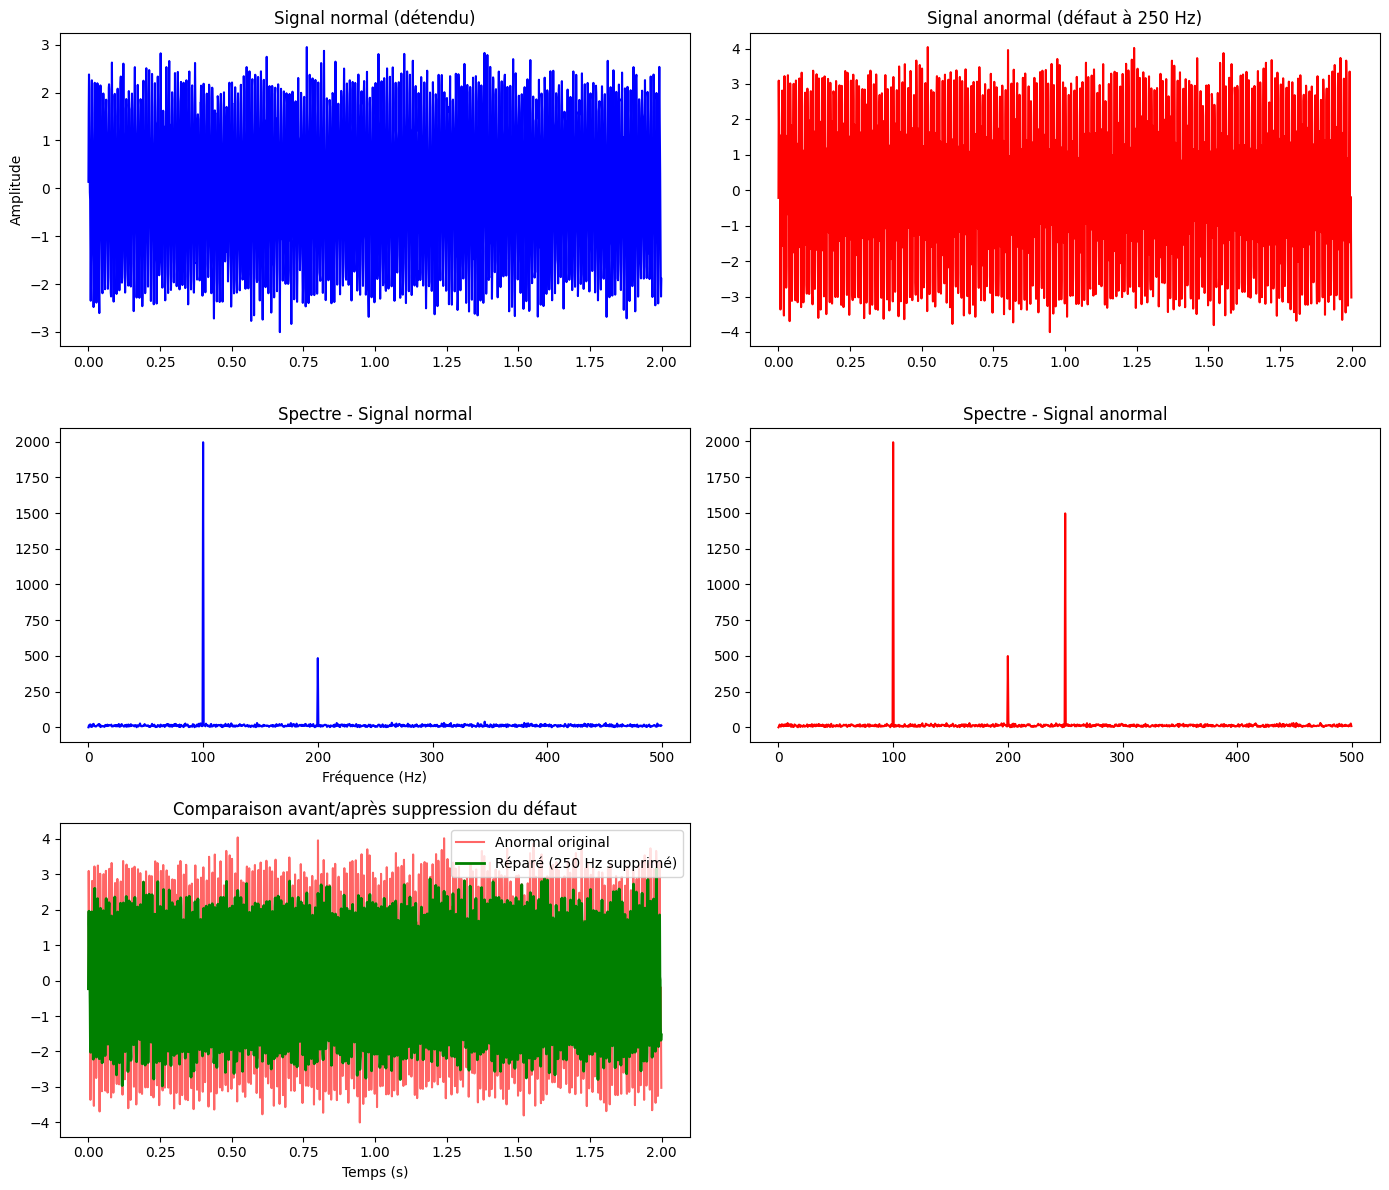


Conclusion : La fréquence parasite à 250 Hz indique clairement un défaut mécanique.


In [11]:
import numpy as np
from scipy import signal, fft, stats
import matplotlib.pyplot as plt

np.random.seed(42)
fs = 1000
duration = 2
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Signal normal
signal_normal = (2 * np.sin(2*np.pi*100*t) +
                 0.5 * np.sin(2*np.pi*200*t) +
                 np.random.randn(len(t)) * 0.3)

# Signal anormal (fréquence parasite à 250 Hz = défaut)
signal_anormal = (2 * np.sin(2*np.pi*100*t) +
                  0.5 * np.sin(2*np.pi*200*t) +
                  1.5 * np.sin(2*np.pi*250*t) +  # <-- défaut
                  np.random.randn(len(t)) * 0.3)

# Prétraitement
sig_norm_det = signal.detrend(signal_normal)
sig_anorm_det = signal.detrend(signal_anormal)

# FFT
fft_norm = fft.fft(sig_norm_det)
fft_anorm = fft.fft(sig_anorm_det)
freq = fft.fftfreq(len(t), 1/fs)
fft_abs_norm = np.abs(fft_norm)
fft_abs_anorm = np.abs(fft_anorm)

# Détection des pics significatifs
seuil = 100
pics_norm = freq[fft_abs_norm > seuil]
pics_anorm = freq[fft_abs_anorm > seuil]

print("Fréquences dominantes signal normal :", np.round(pics_norm[pics_norm > 0]))
print("Fréquences dominantes signal anormal :", np.round(pics_anorm[pics_anorm > 0]))

# Suppression de la fréquence 250 Hz dans le signal anormal
fft_repare = fft_anorm.copy()
idx_250 = np.argmin(np.abs(freq - 250))
idx_m250 = np.argmin(np.abs(freq + 250))
fft_repare[idx_250] = 0
fft_repare[idx_m250] = 0
signal_repare = fft.ifft(fft_repare).real

# Statistiques
print("\nStatistiques signal normal :", stats.describe(sig_norm_det))
print("Statistiques signal anormal :", stats.describe(sig_anorm_det))

# Visualisation complète
plt.figure(figsize=(14, 12))

plt.subplot(3, 2, 1)
plt.plot(t, sig_norm_det, color='blue')
plt.title('Signal normal (détendu)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 2)
plt.plot(t, sig_anorm_det, color='red')
plt.title('Signal anormal (défaut à 250 Hz)')

plt.subplot(3, 2, 3)
plt.plot(freq[:len(t)//2], fft_abs_norm[:len(t)//2], color='blue')
plt.title('Spectre - Signal normal')
plt.xlabel('Fréquence (Hz)')

plt.subplot(3, 2, 4)
plt.plot(freq[:len(t)//2], fft_abs_anorm[:len(t)//2], color='red')
plt.title('Spectre - Signal anormal')

plt.subplot(3, 2, 5)
plt.plot(t, sig_anorm_det, color='red', alpha=0.6, label='Anormal original')
plt.plot(t, signal_repare, color='green', linewidth=2, label='Réparé (250 Hz supprimé)')
plt.title('Comparaison avant/après suppression du défaut')
plt.xlabel('Temps (s)')
plt.legend()

plt.tight_layout()
plt.show()

print("\nConclusion : La fréquence parasite à 250 Hz indique clairement un défaut mécanique.")


---
# Ressources
- https://scipy.org/


> **Prochaine séance :**
> * Pandas —

Bon courage à tous, et surtout : codez, cassez, réparez, recommencez.  

C’est comme ça qu’on devient bon en **Data Science**.

À la semaine prochaine inchae ALLAH !

<br>
<hr>
<div style="font-size:14px; line-height:1.5;">
<strong style="font-size:16px;">Y. EL ALLIOUI</strong><br>
<span style="color:#555;">FPK – USMS</span><br>
<a href="mailto:y.elallioui@usms.ma" style="color:#2c3e50; text-decoration:none;">
y.elallioui@usms.ma
</a>
</div>